##**H20 AutoML Avocado Prices**


##**Abstract**

The dataset encapsulates a comprehensive collection of avocado sales data spanning various regions and dates. Each entry chronicles the average price of avocados and the total volume sold, alongside the detailed breakdown of sales by product categories—specifically, the PLU 4046, PLU 4225, PLU 4770 avocados, as well as small, large, and extra-large bags. The dataset further distinguishes between conventional and organic types, providing a layered perspective on consumer preferences and market dynamics.By employing machine learning techniques, including regression analysis and AutoML frameworks, we seek to understand the underlying patterns that characterize average price of avocados.Through rigorous analysis, the assignment will address the significance of relationships within the data, examine potential model assumptions and violations, and scrutinize the presence of multicollinearity. The outcome is expected to bolster strategic decision-making in agricultural production, supply chain optimization, and targeted marketing efforts.








Objective: To perform an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.


##**Importing required Libraries and H20 Initialization**
Automated machine learning (AutoML) streamlines the application of machine learning to solve practical problems by automating the entire process. H2O AutoML simplifies tasks such as initial data preprocessing, training and optimizing models, and combining multiple models through ensembling and stacking techniques to achieve optimal performance. This automation allows developers to concentrate on other crucial aspects such as gathering data, crafting features, and deploying the model. The initialization of H2O is carried out in the subsequent steps.

In [122]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [184]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [185]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [209]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr
sns.set(rc={"figure.figsize":(16,8)})

In [186]:
Run_time=240
usable_memory=0.6
virtual_mem=psutil.virtual_memory()
memory=int(round(int(usable_memory*virtual_mem.available)/1073741824,0))
print(memory)

1


In [187]:
port_num=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=memory,port=port_num) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:39043..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpl8mvsx_8
  JVM stdout: /tmp/tmpl8mvsx_8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpl8mvsx_8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:39043
Connecting to H2O server at http://127.0.0.1:39043 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_ktola4
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:39043
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [188]:
df_p = pd.read_csv('https://raw.githubusercontent.com/Jashu284/DSMT/main/avocado.csv') #Reading dataset from github
df_p=df_p.drop('Unnamed: 0',axis=1) #Dropping unwanted columns

In [189]:
# Create 'Day' and 'Month' columns from 'Date'
df_p['Date'] = pd.to_datetime(df_p['Date'])
df_p['Day'] = df_p['Date'].dt.day
df_p['Month'] =df_p['Date'].dt.month

#original 'Date' column as it's no longer needed in its original form
df_p.drop(columns=['Date'], inplace=True)

# Display the modified DataFrame to verify the changes
df_p.head()


AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Day  Month  
0     8603.62       93.25          0.0  conventional  2015  Albany   27     12  
1     9408.07       97.49          0.0  conventional  2015  Albany   20     12  
2     8042.21      103.14          0.0  conventional  2015  Albany   13     12  
3     5677.40      133.76          0.0  conventional  2015  Albany    6     12  
4     5986.26      197.69          0.0  conventional  2015  Albany   29     11

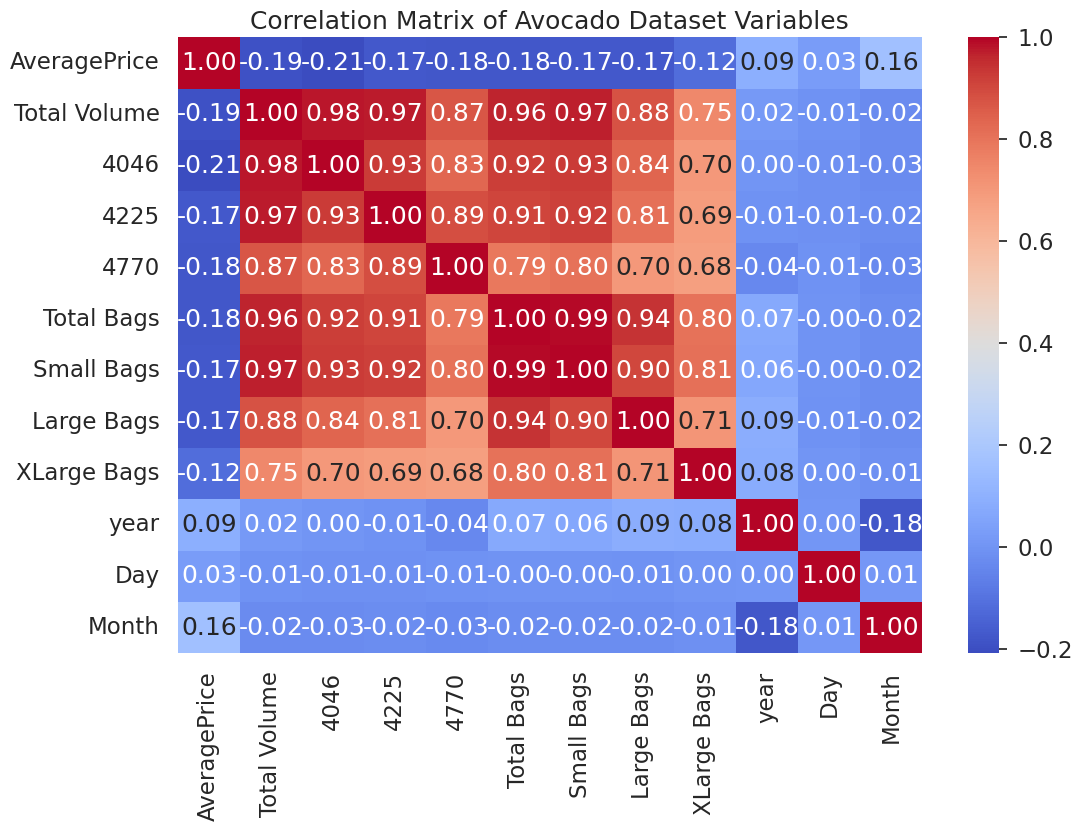

AveragePrice    1.000000
Month           0.162409
year            0.093197
Day             0.027386
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dropping the 'Unnamed: 0' column as it seems to be an index-like column without much relevance
#df_p.drop('Unnamed: 0', axis=1, inplace=True)

# Calculating the correlation matrix
correlation_matrix = df_p.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Avocado Dataset Variables')
plt.show()

# Displaying the correlation values of independent variables with 'AveragePrice'
correlation_with_target = correlation_matrix['AveragePrice'].sort_values(ascending=False)
correlation_with_target

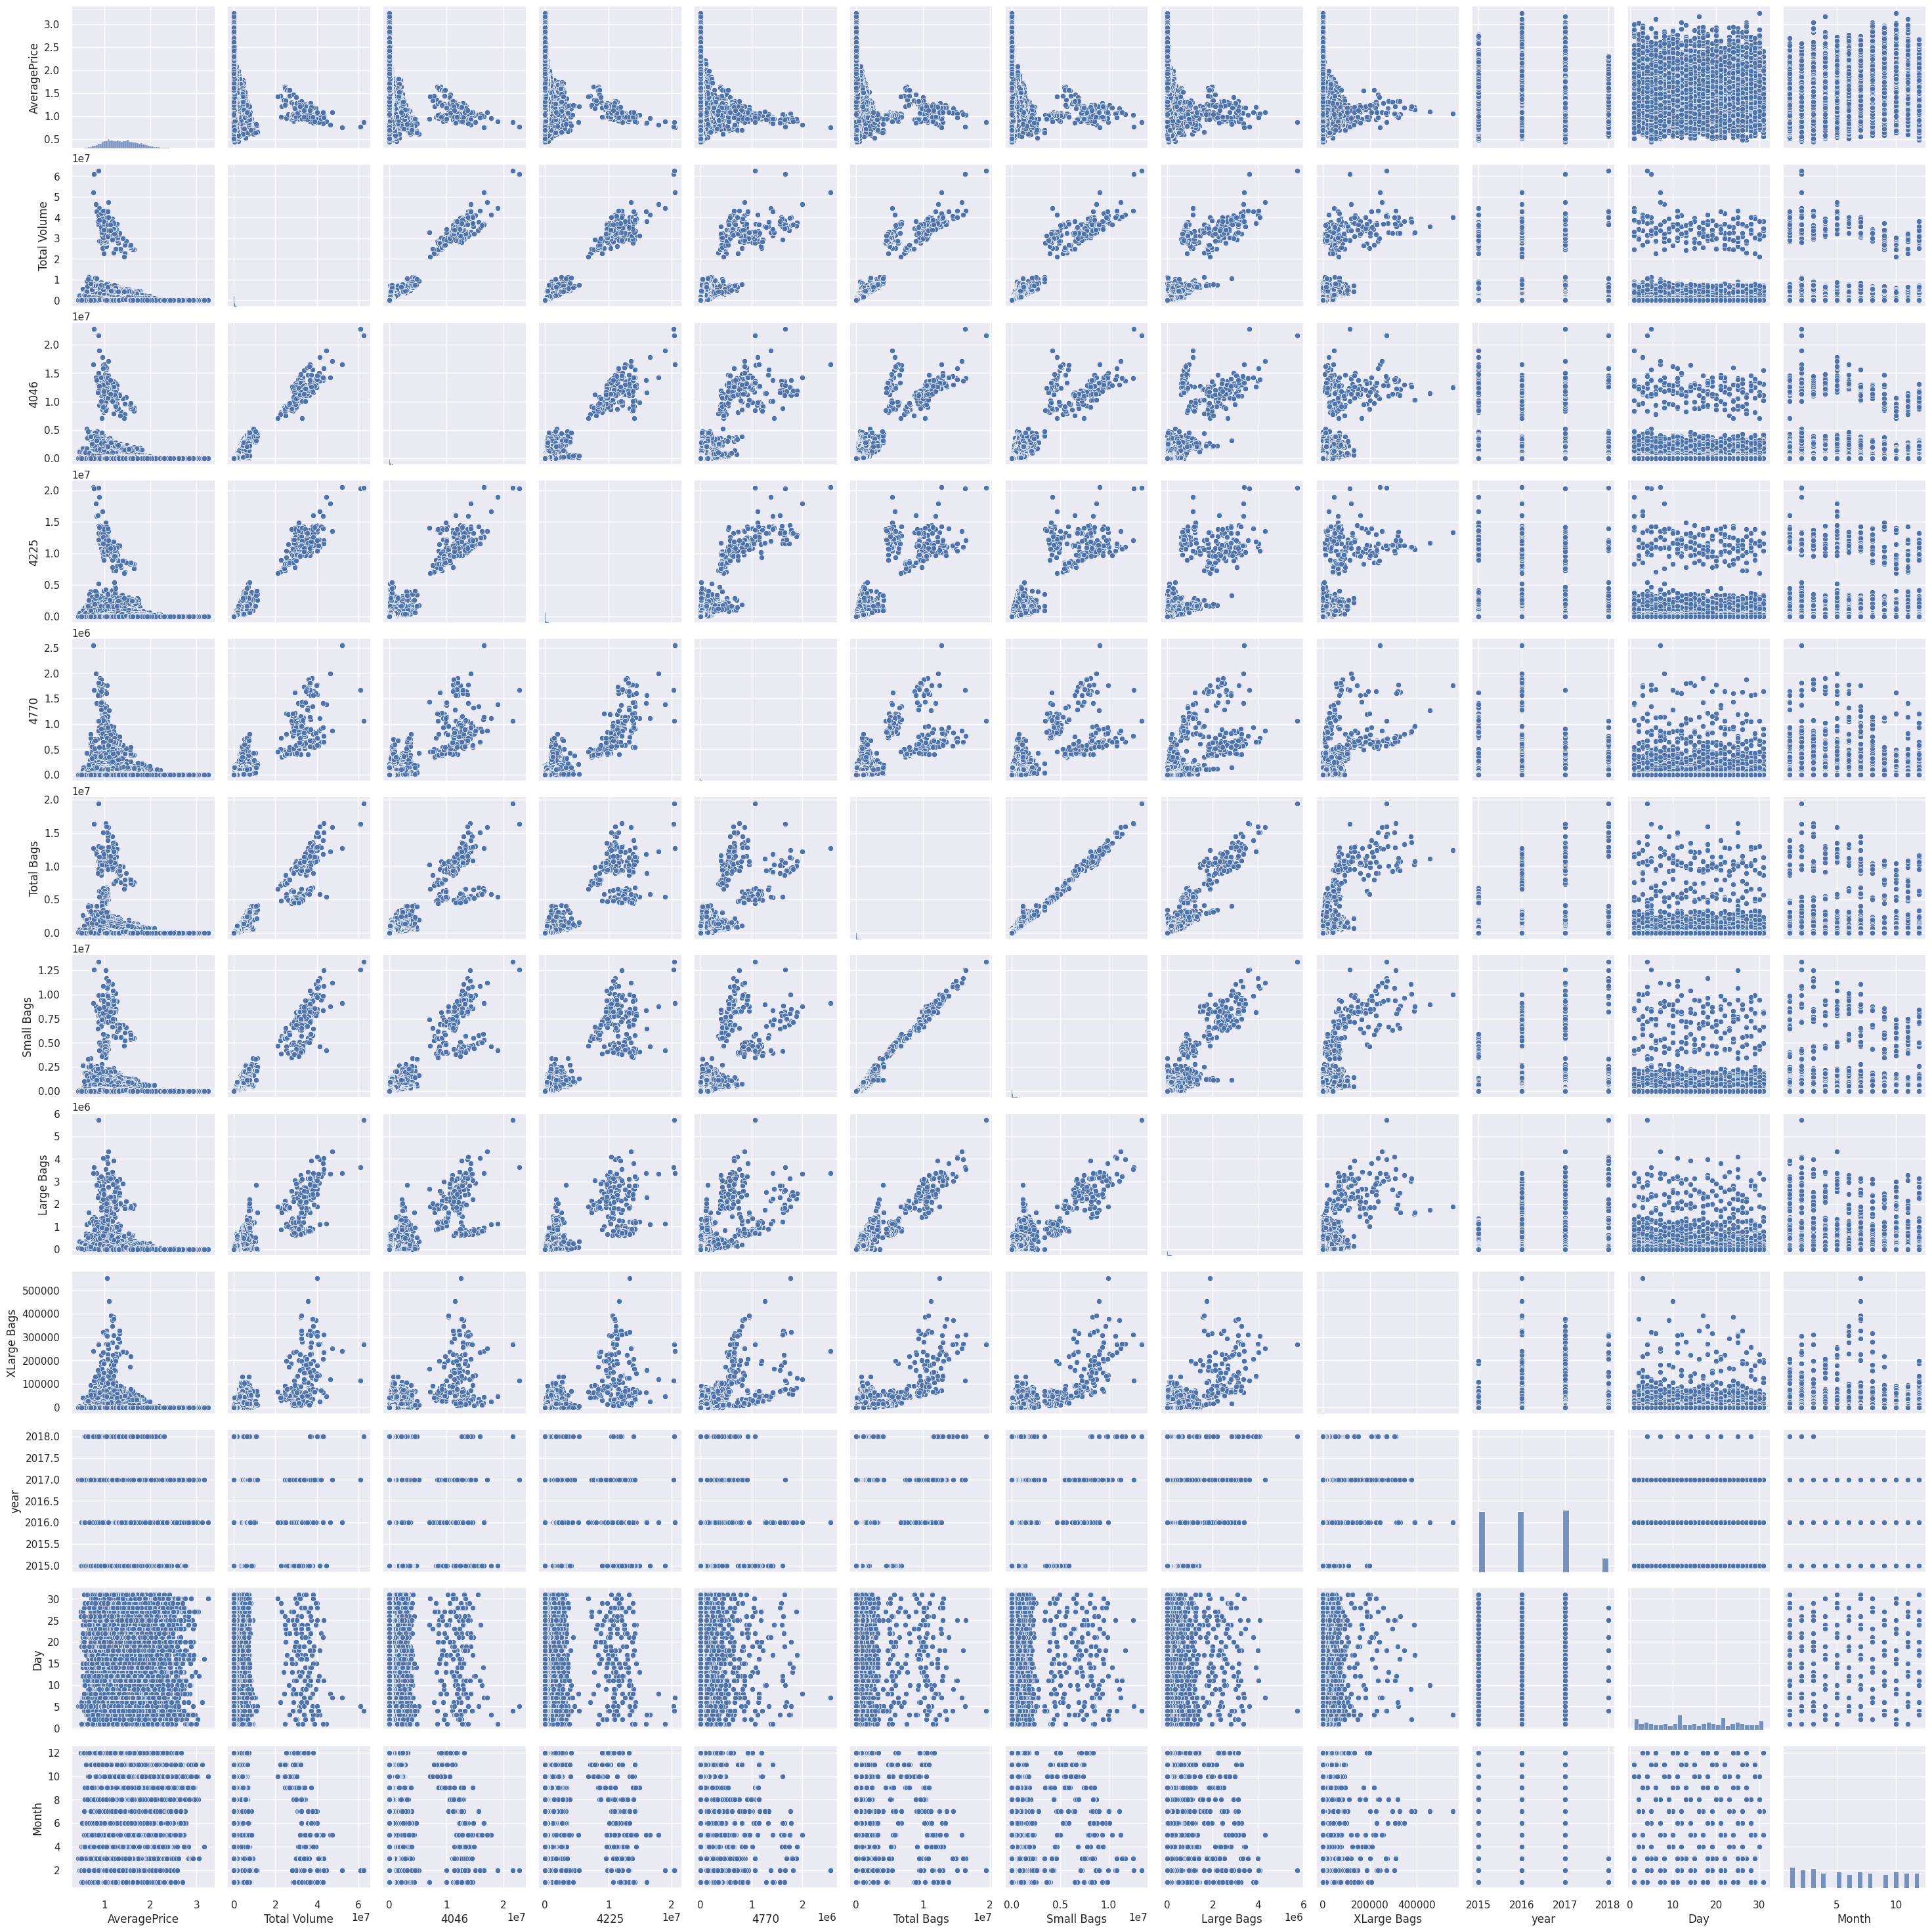

In [237]:
correlation_matrix = df_p.select_dtypes(include=[float, int]).corr()

# Display the correlation matrix
#print(correlation_matrix)
sns.pairplot(df_p)

The correlation matrix suggests that there are no strong linear relationships between 'AveragePrice' and the other features. However, the weak correlations present indicate potential trends, such as seasonal and yearly price variations, and the impact of sales volume on price. These insights could be valuable for further analysis, predictive modeling, and strategic planning in the avocado market.

## **Calculating VIF(Variance Inflation Factor)**

In [191]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_p1=df_p.copy()
df_p1=df_p1.drop(['AveragePrice'], axis=1)
df_p1['type_encoded'] = label_encoder.fit_transform(df_p1['type'])
df_p1['region_encoded'] = label_encoder.fit_transform(df_p1['region'])
#Indicate which variables to compute VIF
Multic = df_p1.select_dtypes(include=[np.number])
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables           VIF
0     Total Volume  5.212907e+09
1             4046  6.947630e+08
2             4225  6.333557e+08
3             4770  4.973838e+06
4       Total Bags  2.502000e+14
5       Small Bags  1.429714e+14
6       Large Bags  1.521486e+13
7      XLarge Bags  7.856874e+10
8             year  1.125114e+01
9              Day  4.188894e+00
10           Month  4.063486e+00
11    type_encoded  2.123126e+00
12  region_encoded  4.160506e+00

From the VIF calculation we can see that there are high values i.e., greater than 10. So here total total volume is the sum of "4225,4046,4770' and total bags is the sum of "xlarge, large, small bags". So dropping the total volume, total bags from the dataset and calculate VIF again

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_p1=df_p.copy()
df_p1=df_p1.drop(['AveragePrice','Total Volume','Total Bags'], axis=1)
df_p1['type_encoded'] = label_encoder.fit_transform(df_p1['type'])
df_p1['region_encoded'] = label_encoder.fit_transform(df_p1['region'])
#Indicate which variables to compute VIF
Multic = df_p1.select_dtypes(include=[np.number])
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables        VIF
0             4046  10.609736
1             4225  14.127761
2             4770   5.613056
3       Small Bags  20.522569
4       Large Bags   5.864573
5      XLarge Bags   3.517298
6             year  11.248954
7              Day   4.188880
8            Month   4.062353
9     type_encoded   2.119383
10  region_encoded   4.159907

Here Year, small bags, 4225 and 4046 are also greater than 10. But these columns cannot be dropped because their contribution is effiicient in predicting the averageprice.

In [193]:
dff=df_p.copy()
dff['type_encoded1'] = label_encoder.fit_transform(dff['type'])
dff['region_encoded1'] = label_encoder.fit_transform(dff['region'])
dff.rename(columns={'4046': 'Var_4046',
                     '4225': 'Var_4225',
                     '4770': 'Var_4770',
                     'Total Volume': 'Total_Volume',
                     'Total Bags': 'Total_Bags',
                     'Small Bags': 'Small_Bags',
                     'Large Bags': 'Large_Bags',
                     'XLarge Bags': 'XLarge_Bags'}, inplace=True)

##**Performing OLS for understanding relationships between variables and making predictions.**

In [194]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('AveragePrice ~Var_4046 + XLarge_Bags + type + Small_Bags+ region+Day+Month+Large_Bags+year+Var_4225+Var_4770 ', data=dff).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     417.6
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        01:57:42   Log-Likelihood:                -1130.0
No. Observations:               18249   AIC:                             2388.
Df Residuals:                   18185   BIC:                             2888.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -107.5652      4.264    -25.229      0.000    -115.922     -99.208
type[T.organic]                   0.4920      0.004    121.857      0.000       0.484       0.500
region[T.Atlanta]                -0.2227      0.020    -11.219      0.000      -0.262      -0.184
region[T.BaltimoreWashington]    -0.0237      0.020     -1.195      0.232      -0.063       0.015
region[T.Boise]                  -0.2131      0.020    -10.742      0.000      -0.252      -0.174
region[T.Boston]                 -0.0273      0.020     -1.373      0.170      -0.066       0.012
region[T.BuffaloRochester]       -0.0438      0.020     -2.210      0.027      -0.083      -0.005
region[T.California]             -0.1736      0.020     -8.553      0.000      -0.213      -0.134
region[T.Charlotte]               0.0452      0.020      2.280      0.023       0.006       0.084
region[T.Chicago]                -0.0025      0.020     -0.126      0.899      -0.042       0.037
region[T.CincinnatiDayton]       -0.3495      0.020    -17.601      0.000      -0.388      -0.311
region[T.Columbus]               -0.3090      0.020    -15.573      0.000      -0.348      -0.270
region[T.DallasFtWorth]          -0.4762      0.020    -23.958      0.000      -0.515      -0.437
region[T.Denver]                 -0.3335      0.020    -16.706      0.000      -0.373      -0.294
region[T.Detroit]                -0.2906      0.020    -14.620      0.000      -0.330      -0.252
region[T.GrandRapids]            -0.0587      0.020     -2.959      0.003      -0.098      -0.020
region[T.GreatLakes]             -0.2266      0.020    -11.069      0.000      -0.267      -0.187
region[T.HarrisburgScranton]     -0.0476      0.020     -2.398      0.017      -0.086      -0.009
region[T.HartfordSpringfield]     0.2587      0.020     13.038      0.000       0.220       0.298
region[T.Houston]                -0.5112      0.020    -25.724      0.000      -0.550      -0.472
region[T.Indianapolis]           -0.2469      0.020    -12.443      0.000      -0.286      -0.208
region[T.Jacksonville]           -0.0500      0.020     -2.521      0.012      -0.089      -0.011
region[T.LasVegas]               -0.1785      0.020     -8.994      0.000      -0.217      -0.140
region[T.LosAngeles]             -0.3555      0.020    -17.639      0.000      -0.395      -0.316
region[T.Louisville]             -0.2741      0.020    -13.816      0.000      -0.313      -0.235
region[T.MiamiFtLauderdale]      -0.1326      0.020     -6.674      0.000      -0.172      -0.094
region[T.Midsouth]               -0.1473      0.020     -7.352      0.000      -0.187      -0.108
region[T.Nashville]              -0.3492      0.020    -17.597      0.000      -0.388      -0.310
region[T.NewOrleansMobile]       -0.2584     

From the above observations we can see that P>|t| value for Var_4770 is 0.966 which is not ideal and can cause problem to model's overall fit. So we can remove the column Var_4770.

In [229]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('AveragePrice ~Var_4046 + XLarge_Bags + type + Small_Bags+ region+Day+Month+Large_Bags+year+Var_4225', data=dff).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:55:47   Log-Likelihood:                -1130.0
No. Observations:               18249   AIC:                             2386.
Df Residuals:                   18186   BIC:                             2878.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -107.5749      4.257    -25.267      0.000    -115.920     -99.230
type[T.organic]                   0.4920      0.004    121.860      0.000       0.484       0.500
region[T.Atlanta]                -0.2227      0.020    -11.220      0.000      -0.262      -0.184
region[T.BaltimoreWashington]    -0.0237      0.020     -1.195      0.232      -0.063       0.015
region[T.Boise]                  -0.2131      0.020    -10.744      0.000      -0.252      -0.174
region[T.Boston]                 -0.0273      0.020     -1.373      0.170      -0.066       0.012
region[T.BuffaloRochester]       -0.0438      0.020     -2.210      0.027      -0.083      -0.005
region[T.California]             -0.1736      0.020     -8.555      0.000      -0.213      -0.134
region[T.Charlotte]               0.0452      0.020      2.279      0.023       0.006       0.084
region[T.Chicago]                -0.0026      0.020     -0.131      0.896      -0.042       0.036
region[T.CincinnatiDayton]       -0.3495      0.020    -17.602      0.000      -0.388      -0.311
region[T.Columbus]               -0.3090      0.020    -15.576      0.000      -0.348      -0.270
region[T.DallasFtWorth]          -0.4763      0.020    -23.961      0.000      -0.515      -0.437
region[T.Denver]                 -0.3335      0.020    -16.707      0.000      -0.373      -0.294
region[T.Detroit]                -0.2906      0.020    -14.639      0.000      -0.330      -0.252
region[T.GrandRapids]            -0.0587      0.020     -2.960      0.003      -0.098      -0.020
region[T.GreatLakes]             -0.2268      0.020    -11.225      0.000      -0.266      -0.187
region[T.HarrisburgScranton]     -0.0476      0.020     -2.398      0.017      -0.086      -0.009
region[T.HartfordSpringfield]     0.2587      0.020     13.040      0.000       0.220       0.298
region[T.Houston]                -0.5112      0.020    -25.730      0.000      -0.550      -0.472
region[T.Indianapolis]           -0.2469      0.020    -12.444      0.000      -0.286      -0.208
region[T.Jacksonville]           -0.0500      0.020     -2.522      0.012      -0.089      -0.011
region[T.LasVegas]               -0.1785      0.020     -8.995      0.000      -0.217      -0.140
region[T.LosAngeles]             -0.3556      0.020    -17.652      0.000      -0.395      -0.316
region[T.Louisville]             -0.2741      0.020    -13.816      0.000      -0.313      -0.235
region[T.MiamiFtLauderdale]      -0.1326      0.020     -6.674      0.000      -0.172      -0.094
region[T.Midsouth]               -0.1473      0.020     -7.356      0.000      -0.187      -0.108
region[T.Nashville]              -0.3492      0.020    -17.598      0.000      -0.388      -0.310
region[T.NewOrleansMobile]       -0.2584     

Here after removal of Var_4770 the R^2 value remains unchanged. So proceeding with the dropped columns for further AUTOML


In [195]:
df = h2o.H2OFrame(df_p)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [196]:
t_rows=0.80
df_train, df_test = df.split_frame([t_rows])
print(df_train.shape)
print(df_test.shape)

(14570, 14)
(3679, 14)


In [197]:
X=df.columns
y_numeric ='AveragePrice'
X.remove(y_numeric)
X

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region',
 'Day',
 'Month']

# **H2O AutoML execution**
the run_time and memory are already specified above, Now we are running AutoML for various models for the original dataset without removing the columns

In [198]:
aml = H2OAutoML(max_runtime_secs=Run_time, seed=1)

In [199]:
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_15811


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/4
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      1/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0049417006230426065
RMSE: 0.07029723055030408
MAE: 0.05061054008719995
RMSLE: 0.027772817285590307
Mean Residual Deviance: 0.0049417006230426065
R^2: 0.9692419557677964
Null degrees of freedom: 10042
Residual degrees of freedom: 10039
Null deviance: 1613.5615700911799
Residual deviance: 49.6294993572169
AIC: -24817.990102839452

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.011060135873157125
RMSE: 0.10516718058956
MAE: 0.07491807940899423
RMSLE: 0.041424340541205085
Mean Residual Deviance: 0.011060135873157125
R^2: 0.9318094289802303
Null degrees of freedom: 14569
Residual degrees of freedom: 14566
Null deviance: 2363.4347085188692
Residual deviance: 161.14617967189932
AIC: -24271.3556713501

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.074929   0.00126168   0.0733785     0.0749313     0.0757789     0.074054      0.0765023
mean_residual_deviance  0.0110606  0.000302084  0.0107815     0.0113519     0.0112683     0.0106909     0.0112103
mse                     0.0110606  0.000302084  0.0107815     0.0113519     0.0112683     0.0106909     0.0112103
null_deviance           472.687    18.4608      462.834       480.76        497.554       473.713       448.572
r2                      0.931768   0.00172013   0.931355      0.930862      0.932519      0.934302      0.929804
residual_deviance       32.2292    1.09179      31.7623       33.227        33.5571       31.1211       31.4786
rmse                    0.105161   0.00143945   0.103834      0.106545      0.106152      0.103397      0.105879
rmsle                   0.0414237  0.000461109  0.0409986     0.0418656     0.0416795     0.0408562     0.0417188

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

##**Observations:**
The model is a Stacked Ensemble comprising 3 base models: 2 GBMs and 1 XGBoost.
The Metalearner algorithm used is GLM with 5-fold cross-validation.
On the training data:
MSE: 0.0033
R^2: 0.9796, indicating a high degree of explained variance.
On cross-validation data:
MSE: 0.0100
R^2: 0.9384, suggesting good predictive performance but slightly lower than training R^2.
Mean metrics from cross-validation:
MAE: 0.0708
RMSE: 0.1002
Residual deviance and null deviance indicate model fit and predictive power.
Overall, the model performs well on both training and cross-validation data, demonstrating strong predictive capability with relatively low error metrics.

##**H2O AutoML for updated dataset of H2O split_frame**

In [239]:
df1=df.drop(['Total Volume','Total Bags','4770'])


In [240]:
t_rows=0.80
df_train_1, df_test_1 = df1.split_frame([t_rows])
print(df_train_1.shape)
print(df_test_1.shape)

(14648, 11)
(3601, 11)


In [144]:
X1=df1.columns
y_numeric_1 ='AveragePrice'
X1.remove(y_numeric_1)
X1

['4046',
 '4225',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region',
 'Day',
 'Month']

In [159]:
df1.head()

AveragePrice     4046      4225    Small Bags    Large Bags    XLarge Bags  type            year  region      Day    Month
--------------  -------  --------  ------------  ------------  -------------  ------------  ------  --------  -----  -------
          1.33  1036.74   54454.8       8603.62         93.25              0  conventional    2015  Albany       27       12
          1.35   674.28   44638.8       9408.07         97.49              0  conventional    2015  Albany       20       12
          0.93   794.7   109150         8042.21        103.14              0  conventional    2015  Albany       13       12
          1.08  1132      71976.4       5677.4         133.76              0  conventional    2015  Albany        6       12
          1.28   941.48   43838.4       5986.26        197.69              0  conventional    2015  Albany       29       11
          1.26  1184.27   48068         6556.47        127.44              0  conventional    2015  Albany       22       11
          0.99  1368.92   73672.7       8196.81        122.05              0  conventional    2015  Albany       15       11
          0.98   703.75  101815         6266.85        562.37              0  conventional    2015  Albany        8       11
          1.02  1022.15   87315.6      11104.5         283.83              0  conventional    2015  Albany        1       11
          1.07   842.4    64757.4       8061.47        564.45              0  conventional    2015  Albany       25       10
[10 rows x 11 columns]

In [ ]:
df_p2=df_p.copy()
df_p2['type_encoded1'] = label_encoder.fit_transform(df_p2['type'])
df_p2['region_encoded1'] = label_encoder.fit_transform(df_p2['region'])
X = df_p2.drop(['Total Volume','Total Bags','4770'], axis=1)
y = df_p2['AveragePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#from sklearn.model_selection import train_test_split
#train, test = df1.split_frame(ratios=[0.8], seed=42)

# Separate the features and target for training
#X_train = train.drop(['AveragePrice'])
#y_train = train['AveragePrice']

# Separate the features and target for testing
#X_test = test.drop(['AveragePrice'])
#y_test = test['AveragePrice']

In [145]:
aml1 = H2OAutoML(max_runtime_secs=Run_time, seed=1)

In [160]:
aml1.train(x=X1,y=y_numeric_1,training_frame=df_train_1)

AutoML progress: |
01:40:54.990: New models will be added to existing leaderboard AutoML_2_20240220_05703@@AveragePrice (leaderboard frame=null) with already 19 models.

██████████████████████████
01:42:32.574: StackedEnsemble_BestOfFamily_4_AutoML_3_20240220_14054 [StackedEnsemble best_of_family_1 (built with AUTO metalearner, using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.

██████████████████████████
01:44:15.909: StackedEnsemble_BestOfFamily_5_AutoML_3_20240220_14054 [StackedEnsemble best_of_family_2 (built with AUTO metalearner, using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.
01:

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_2_20240220_05703


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  5/8
# GBM base models (used / total)      3/4
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      0/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0026525946026691775
RMSE: 0.05150334554831538
MAE: 0.036664286535364035
RMSLE: 0.02038465212584141
Mean Residual Deviance: 0.0026525946026691775
R^2: 0.983574603406069
Null degrees of freedom: 10039
Residual degrees of freedom: 10034
Null deviance: 1621.4191534020522
Residual deviance: 26.63204981079854
AIC: -31053.173160539336

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.01023380498075953
RMSE: 0.10116227053975968
MAE: 0.07136152234459976
RMSLE: 0.040110409467135934
Mean Residual Deviance: 0.01023380498075953
R^2: 0.936664041718905
Null degrees of freedom: 14581
Residual degrees of freedom: 14576
Null deviance: 2356.5842582881696
Residual deviance: 149.22934422943547
AIC: -25419.658400767075

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.071363   0.00125045   0.0697112     0.0727692     0.0721504     0.0704667     0.0717173
mean_residual_deviance  0.0102372  0.000473038  0.0101018     0.0107446     0.0100917     0.00958887    0.0106589
mse                     0.0102372  0.000473038  0.0101018     0.0107446     0.0100917     0.00958887    0.0106589
null_deviance           471.317    20.467       481.871       444.273       497.863       472.516       460.061
r2                      0.936506   0.00471764   0.938153      0.929077      0.939524      0.940905      0.934874
residual_deviance       29.8459    1.26552      29.8004       31.4709       30.0732       27.9228       29.962
rmse                    0.101157   0.00234321   0.100508      0.103656      0.100457      0.0979228     0.103242
rmsle                   0.0401071  0.000953887  0.0395257     0.0413407     0.0398975     0.0389809     0.0407909

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

##**Observations:**

Stacked Ensemble model with 5 base models (3 GBMs, 2 XGBoost).
Metalearner algorithm: GLM with 5-fold cross-validation.
Training data performance:
MSE: 0.0027
R^2: 0.9836, indicating high explained variance.
Cross-validation data performance:
MSE: 0.0102
R^2: 0.9367, slightly lower than training R^2.
Mean metrics from cross-validation:
MAE: 0.0714
RMSE: 0.1012
Both training and cross-validation results show strong predictive performance, with slightly lower R^2 and higher error metrics compared to the previous AutoML model.

**This model with more base models might offer a better fit.**

In [149]:
print(aml1.leaderboard)

model_id                                                    rmse        mse        mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20240220_05703     0.101162  0.0102338  0.0713615  0.0401104                 0.0102338
StackedEnsemble_AllModels_2_AutoML_2_20240220_05703     0.101171  0.0102356  0.0713693  0.0401157                 0.0102356
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_05703  0.102106  0.0104257  0.0720319  0.0405193                 0.0104257
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_05703  0.102124  0.0104294  0.072043   0.040526                  0.0104294
GBM_4_AutoML_2_20240220_05703                           0.103418  0.0106952  0.0726922  0.0410077                 0.0106952
GBM_3_AutoML_2_20240220_05703                           0.105491  0.0111283  0.0744914  0.0416988                 0.0111283
StackedEnsemble_BestOfFamily_1_AutoML_2_20240220_05703  0.107224  0.0114969  0.0765911  0.0424431                 0.0114969
GBM_1_Au

In [171]:
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_AllModels_1_AutoML_2_20240220_05703': 0,
 'StackedEnsemble_AllModels_2_AutoML_2_20240220_05703': 1,
 'StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_05703': 2,
 'StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_05703': 3,
 'GBM_9_AutoML_3_20240220_14054': 4,
 'GLM_2_AutoML_3_20240220_14054': 30}

In [172]:
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])
best_model1.algo

4


'gbm'

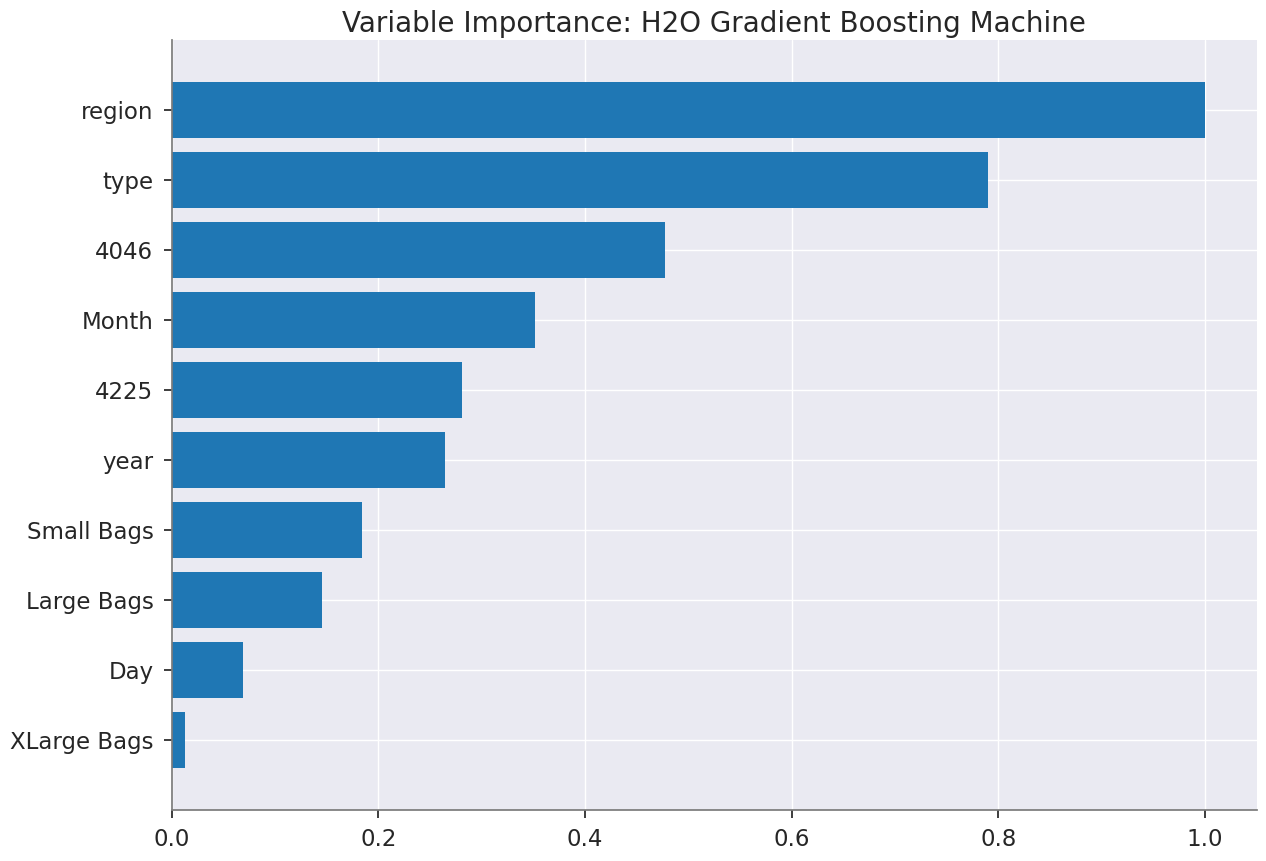

<Figure size 800x550 with 0 Axes>

In [173]:
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

The variable importance plot from the H2O Gradient Boosting Machine indicates that 'region' and 'type' are the most influential predictors of the target variable. '4046' and '4225', which likely refer to avocado sizes or types, also significantly impact the model's predictions. Seasonal factors like 'Month' and annual trends indicated by 'year' are moderately important. The size categories of packaging, particularly 'Small Bags', influence the model, while 'Day' and 'XLarge Bags' have minimal impact. Overall, location, avocado type, and temporal factors are key determinants in the model's predictions.






30
glm


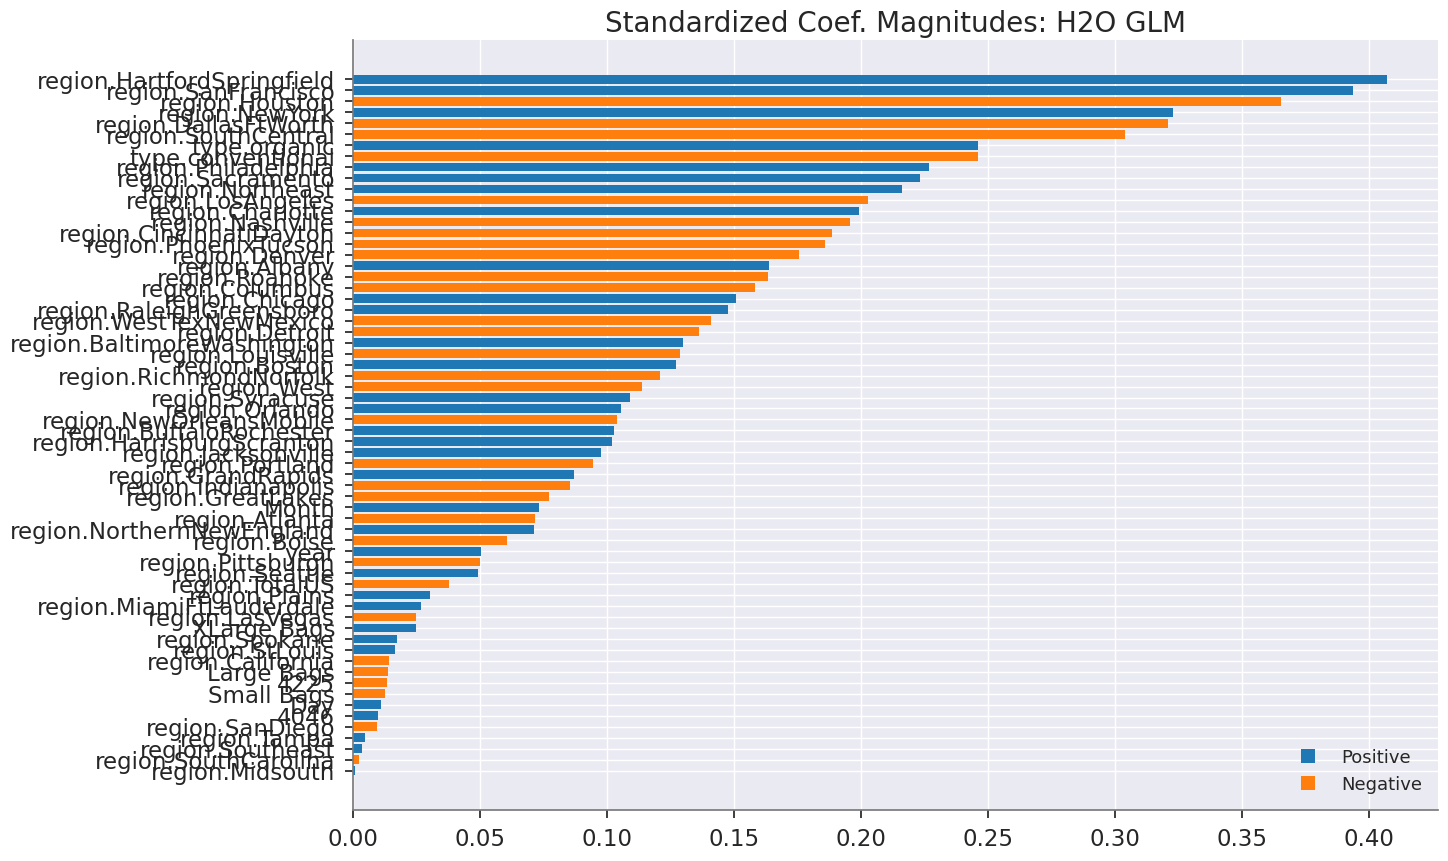

In [174]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo)
  glm_model1.std_coef_plot()

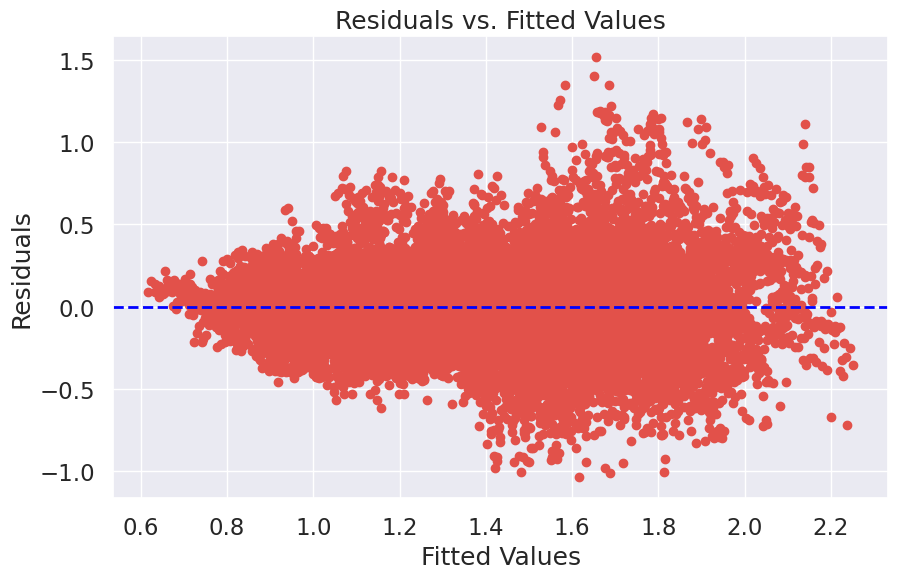

In [168]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming `model1` is your fitted OLS model
fitted_vals = results.predict()
residuals = results.resid

plt.figure(figsize=(10, 6))
plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


Random Distribution: Residuals are dispersed randomly around the horizontal line, which is indicative of a well-fitting model.
No Patterns: The lack of clear patterns suggests that the model has captured the underlying data structure well.
Homoscedasticity: The cloud of points appears to have a constant spread across the range of fitted values, which indicates homoscedasticity (constant variance of residuals).
No Outliers: There are no significant outliers that stand out, which suggests that all data points are fairly well explained by the model.
Centered around Zero: The residuals are centered around the zero line, meaning the model has no systematic bias.

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, results.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 2376.9519347371465, 'p-value': 0.0, 'f-value': 43.927139881368696, 'f p-value': 0.0}


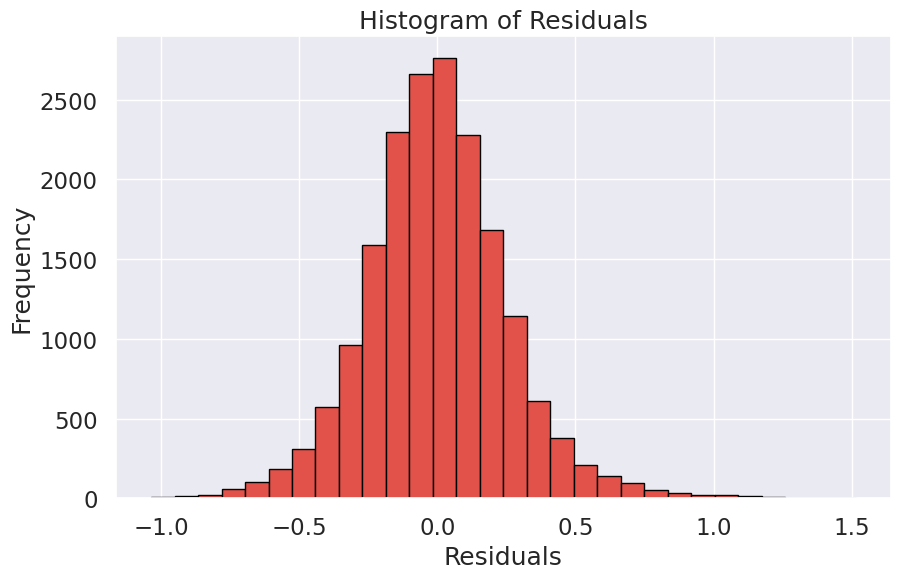

In [169]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


The shape of the histogram is approximately bell-shaped, suggesting that the residuals may be normally distributed, which is a good sign for a regression model. The peak of the histogram is around zero, indicating that the model does not have a systematic bias.The residuals appear to be contained within a reasonable range without long tails, suggesting there are no extreme outliers in the predictions.

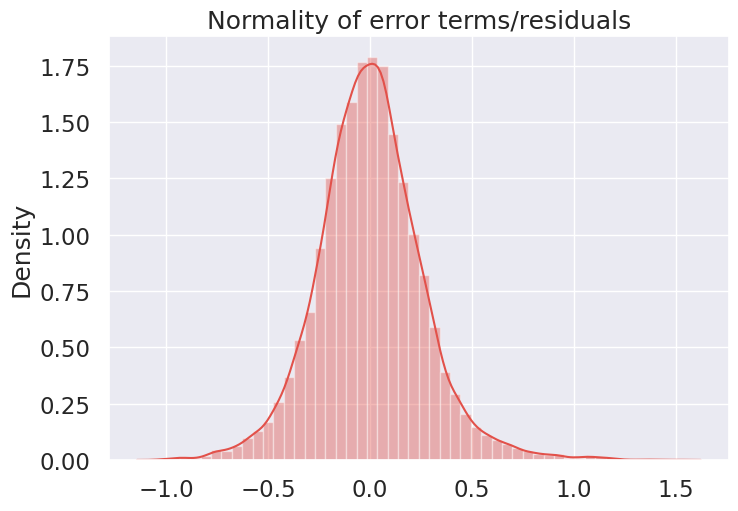

In [170]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Bell Shape: The density of residuals seems to have a bell-shaped curve, which is consistent with a normal distribution.
Symmetry: The plot suggests symmetry around the mean, which is centered near zero. This is a good sign that errors are distributed evenly and the model isn’t biased towards over or underestimation.
Peak Concentration: The peak of the density curve aligns with the mean, indicating that most residuals are close to the mean value.
Tails: The tails on either side of the peak should taper off equally

In [175]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

avocado_glm = H2OGeneralizedLinearEstimator(family="gaussian", lambda_=0, compute_p_values=True, nfolds=5)  # Elastic Net Regularization
avocado_glm_regularization_ridge = H2OGeneralizedLinearEstimator(family="gaussian", alpha=0, nfolds=5)  # RIDGE Regularization
avocado_glm_regularization_lasso = H2OGeneralizedLinearEstimator(family="gaussian", alpha=1, nfolds=5)  # LASSO Regularization


In [176]:
avocado_glm.train(x=X1, y=y_numeric_1, training_frame=df_train_1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708386156092_58


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              62                            62                             1                       py_80_sid_90be

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06599391863301866
RMSE: 0.25689281545621057
MAE: 0.1942525238937
RMSLE: 0.10366916040216072
Mean Residual Deviance: 0.06599391863301866
R^2: 0.5915704779207076
Null degrees of freedom: 14581
Residual degrees of freedom: 14519
Null deviance: 2356.155149135591
Residual deviance: 962.3233215066782
AIC: 1873.2376770523406

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.06658805622524361
RMSE: 0.25804661638014864
MAE: 0.19522990010471566
RMSLE: 0.1041550992693824
Mean Residual Deviance: 0.06658805622524361
R^2: 0.5878934219451759
Null degrees of freedom: 14581
Residual degrees of freedom: 14519
Null deviance: 2356.5897536374314
Residual deviance: 970.9870358765022
AIC: 2003.9307425982365

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.195241   0.00252318  0.19268       0.198003      0.197382      0.195473      0.192664
mean_residual_deviance  0.0666003  0.00242332  0.0642209     0.0694254     0.0687599     0.0662434     0.0643518
mse                     0.0666003  0.00242332  0.0642209     0.0694254     0.0687599     0.0662434     0.0643518
null_deviance           471.318    19.9153     453.073       496.508       451.203       485.895       469.911
r2                      0.587554   0.0113373   0.591911      0.590234      0.567508      0.594927      0.593191
residual_deviance       194.197    6.85274     184.892       203.278       195.141       196.809       190.867
rmse                    0.258036   0.00469012  0.253418      0.263487      0.262221      0.257378      0.253677
rmsle                   0.104155   0.00172744  0.102083      0.104047      0.106849      0.104244      0.10355

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse        training_deviance    training_mae     training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -------------------  -------------------  ---------------  ------------------
    2024-02-20 01:49:26  0.000 sec   0             2356.155161301578          0.16157969834738567
    2024-02-20 01:49:26  0.087 sec   1                                                             0.25689281545621057  0.06599391863301866  0.1942525238937  0.5915704779207076

Variable Importances: 
variable                    relative_importance    scaled_importance     percentage
--------------------------  ---------------------  --------------------  ---------------------
region.Houston              0.5300646424293518     1.0                   0.04711518056732212
type.organic                0.491897851228714      0.927995968518642     0.04372269762250279
region.DallasFtWorth        0.4855361580848694     0.9159942377208884    0.04315723390884624
region.SouthCentral         0.4693036675453186     0.885370632144868     0.04171439720250958
region.LosAngeles           0.3670833110809326     0.6925255557483412    0.03262846660656819
region.Nashville            0.3600479066371918     0.6792528265742225    0.03200311957490843
region.CincinnatiDayton     0.3529519736766815     0.6658659

In [177]:
avocado_glm_regularization_ridge.train(x=X1, y=y_numeric_1, training_frame=df_train_1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708386156092_59


GLM Model: summary
    family    link      regularization               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 1.236E-4 )  64                            64                             1                       py_80_sid_90be

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06599530559199296
RMSE: 0.256895514931641
MAE: 0.194221164904216
RMSLE: 0.10366407653179922
Mean Residual Deviance: 0.06599530559199296
R^2: 0.5915618941753755
Null degrees of freedom: 14581
Residual degrees of freedom: 14517
Null deviance: 2356.155149135591
Residual deviance: 962.3435461424413
AIC: 1877.5441359452172

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.06660370734531612
RMSE: 0.25807694074697207
MAE: 0.1951666338087838
RMSLE: 0.10415488005016833
Mean Residual Deviance: 0.06660370734531612
R^2: 0.5877965587853037
Null degrees of freedom: 14581
Residual degrees of freedom: 14517
Null deviance: 2356.45892221568
Residual deviance: 971.2152605093996
AIC: 2011.3577508130036

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.195167  0.001608    0.195996      0.193923      0.194204      0.197621      0.194091
mean_residual_deviance  0.066587  0.00150869  0.0675166     0.0652582     0.0671706     0.0682435     0.0647458
mse                     0.066587  0.00150869  0.0675166     0.0652582     0.0671706     0.0682435     0.0647458
null_deviance           471.292   13.5435     474.611       467.537       492.409       456.013       465.889
r2                      0.587654  0.0148607   0.57853       0.602127      0.586903      0.568333      0.602377
residual_deviance       194.243   8.24222     199.917       185.986       203.325       196.814       185.173
rmse                    0.258031  0.0029272   0.25984       0.255457      0.259173      0.261235      0.254452
rmsle                   0.10415   0.00141245  0.10376       0.102886      0.103686      0.106583      0.103837

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse      training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -----------------  -------------------  -----------------  ------------------
    2024-02-20 01:49:33  0.000 sec   0             2356.155161301578          0.16157969834738567
    2024-02-20 01:49:33  0.046 sec   1                                                             0.256895514931641  0.06599530559199296  0.194221164904216  0.5915618941753755

Variable Importances: 
variable                    relative_importance    scaled_importance      percentage
--------------------------  ---------------------  ---------------------  ----------------------
region.HartfordSpringfield  0.40481266379356384    1.0                    0.05239276617755023
region.SanFrancisco         0.3917289972305298     0.9676797004312441     0.050699416279456025
region.Houston              0.36352604627609253    0.898010558438148      0.0470492572132212
region.NewYork              0.32091498374938965    0.7927493689106568     0.04153433232273655
region.DallasFtWorth        0.31916967034339905    0.7884379588138605     0.04130844562163957
region.SouthCentral         0.3022930324077606     0.746747963798673      0.039124191460865626
type.conventional           

Model Summary:

Family: Gaussian
Link Function: Identity
Regularization: Ridge (lambda = 1.236E-4)
Total Number of Predictors: 64
Number of Active Predictors: 64
Number of Iterations: 1
Training Frame: py_80_sid_90be
Model Performance on Training Data:

MSE: 0.06599530559199296
RMSE: 0.256895514931641
MAE: 0.194221164904216
RMSLE: 0.10366407653179922
Mean Residual Deviance: 0.06599530559199296
R^2: 0.5915618941753755
Model Performance on Cross-Validation Data:

MSE: 0.06660370734531612
RMSE: 0.25807694074697207
MAE: 0.1951666338087838
RMSLE: 0.10415488005016833
Mean Residual Deviance: 0.06660370734531612
R^2: 0.5877965587853037
Cross-Validation Metrics Summary:

The cross-validation metrics show consistent performance across folds.
Mean and standard deviation of various metrics are provided.
Variable Importances:

The importance of each predictor variable is listed, indicating their contribution to the model.
Variables related to different regions and types (conventional, organic) seem to have the highest importance.
Features related to bag sizes and specific regions are among the most influential predictors.
Scoring History:

Details about the training iterations and the improvement of the model over time are provided.
It seems the model converged quickly within one iteration.
This summary provides a comprehensive overview of the trained GLM model's characteristics, including its performance metrics and feature importances.

In [178]:
avocado_glm_regularization_lasso.train(x=X1, y=y_numeric_1, training_frame=df_train_1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708386156092_60


GLM Model: summary
    family    link      regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 1.236E-4 )  64                            58                             1                       py_80_sid_90be

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.06605023237600263
RMSE: 0.25700239760749827
MAE: 0.1942926412987821
RMSLE: 0.10370649949285507
Mean Residual Deviance: 0.06605023237600263
R^2: 0.5912219580023597
Null degrees of freedom: 14581
Residual degrees of freedom: 14523
Null deviance: 2356.155149135591
Residual deviance: 963.1444885068704
AIC: 1877.675441901482

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.06657822175232585
RMSE: 0.2580275600635053
MAE: 0.1950180032201655
RMSLE: 0.10412106185388048
Mean Residual Deviance: 0.06657822175232585
R^2: 0.5879542864787092
Null degrees of freedom: 14581
Residual degrees of freedom: 14523
Null deviance: 2356.4693197366346
Residual deviance: 970.8436295924156
AIC: 1993.776949813374

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.195036   0.00405144  0.193352      0.191633      0.191736      0.197618      0.20084
mean_residual_deviance  0.0665856  0.00279713  0.0660714     0.0643913     0.0642035     0.0671836     0.0710783
mse                     0.0665856  0.00279713  0.0660714     0.0643913     0.0642035     0.0671836     0.0710783
null_deviance           471.294    12.4764     487.718       469.673       455.909       464.056       479.114
r2                      0.58791    0.012955    0.588034      0.60746       0.591081      0.579493      0.57348
residual_deviance       194.169    8.77216     200.923       184.352       186.318       194.9         204.35
rmse                    0.257997   0.0053789   0.257044      0.253755      0.253384      0.259198      0.266605
rmsle                   0.104112   0.00180317  0.10387       0.1026        0.102716      0.10432       0.107056

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse        training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -------------------  -------------------  ------------------  ------------------
    2024-02-20 01:49:44  0.000 sec   0             2356.155161301578          0.16157969834738567
    2024-02-20 01:49:44  0.051 sec   1                                                             0.25700239760749827  0.06605023237600263  0.1942926412987821  0.5912219580023597

Variable Importances: 
variable                    relative_importance    scaled_importance      percentage
--------------------------  ---------------------  ---------------------  ---------------------
region.HartfordSpringfield  0.4009591341018677     1.0                    0.05446466895656287
region.SanFrancisco         0.387936532497406      0.967521374382375      0.05269573136413479
region.Houston              0.357881098985672      0.8925625295637952     0.04861312269572447
region.NewYork              0.314765989780426      0.7850325956172296     0.0427565404404037
region.DallasFtWorth        0.31288978457450867    0.7803533027757784     0.042501684304843246
region.SouthCentral         0.2915266752243042     0.7270732861026155     0.03959980583473928
type.convention

The GLM model summary you've provided indicates that a Lasso regularized linear regression was performed. Here's a concise summary of the key points from the model's output:

A Lasso regularization with lambda of 1.236E-4 was applied, reducing the predictors from 64 to 58 active ones.
The model's performance on training data shows an RMSE of 0.257 and R² of 0.591, indicating a moderate fit.
Cross-validation metrics are consistent with the training metrics, suggesting the model's generalizability.
The most significant variables in terms of relative importance are regional features and type, with regions like HartfordSpringfield and San Francisco being top predictors.
Some variables like 'region.California' and 'region.Midsouth' have zero relative importance, indicating no contribution to the model.
The use of Lasso regularization helped in feature selection by shrinking the coefficients of less important variables to zero, simplifying the model without substantially increasing error metrics. The relatively moderate R² values suggest that while the model explains some of the variability in the data, there's room for improvement, possibly by feature engineering, using more complex models, or tuning hyperparameters.

In [200]:
# Assuming cirrhosis_glm_regularization_lasso is your fitted H2O GLM model with Lasso regularization

# Get the model's coefficients
coefficients = avocado_glm_regularization_lasso.coef()

# Filter out the predictors with zero coefficients
zero_coefficients = {predictor: coef for predictor, coef in coefficients.items() if coef == 0}

# Print the predictors with zero coefficients
print("Predictors with zero coefficients:", zero_coefficients)


Predictors with zero coefficients: {'region.California': 0.0, 'region.Midsouth': 0.0, 'region.SanDiego': 0.0, 'region.SouthCarolina': 0.0, 'region.StLouis': 0.0, 'region.Tampa': 0.0}


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse        mse        mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  ---------  ---------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_15811  0.106849  0.0114168  0.0747105  0.0414896                 0.0114168                2480                   0.309256  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_15811  0.107048  0.0114593  0.0750367  0.0415673                 0.0114593                2717                   0.209196  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240220_15811     0.107245  0.0115015  0.0749998  0.0416412                 0.0115015                1610                   0.178605  StackedEnsemble
GBM_1_AutoML_1_20240220_15811                           0.110363  0.0121801  0.077174   0.0427371                 0.0121801               12370                   0.16108   GBM
XGBoost_1_AutoML_1_20240220_15811                       0.126866  0.0160949  0.0909445  0.0505293                 0.0160949                4637                   0.020702  XGBoost
GBM_4_AutoML_1_20240220_15811                           0.131421  0.0172714  0.0946843  0.0517856                 0.0172714                1221                   0.031619  GBM
GBM_2_AutoML_1_20240220_15811                           0.150856  0.0227576  0.107853   0.0585631                 0.0227576                 948                   0.024562  GBM
DRF_1_AutoML_1_20240220_15811                           0.151206  0.0228631  0.10345    0.0593098                 0.0228631                1107                   0.003588  DRF
GBM_3_AutoML_1_20240220_15811                           0.157115  0.0246852  0.114859   0.061911                  0.0246852                 659                   0.012373  GBM
XRT_1_AutoML_1_20240220_15811                           0.2473    0.0611572  0.1655     0.0991544                 0.0611572                 518                   0.004523  DRF
GLM_1_AutoML_1_20240220_15811                           0.26017   0.0676885  0.196343   0.104366                  0.0676885                 211                   0.001112  GLM
XGBoost_2_AutoML_1_20240220_15811                       0.314094  0.0986551  0.245957   0.122191                  0.0986551                1328                   0.001512  XGBoost
GBM_5_AutoML_1_20240220_15811                           0.336872  0.113483   0.265907   0.137185                  0.113483                  107                   0.002011  GBM
XGBoost_3_AutoML_1_20240220_15811                       0.539105  0.290634   0.455608   0.225668                  0.290634                  184                   0.000965  XGBoost
[14 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

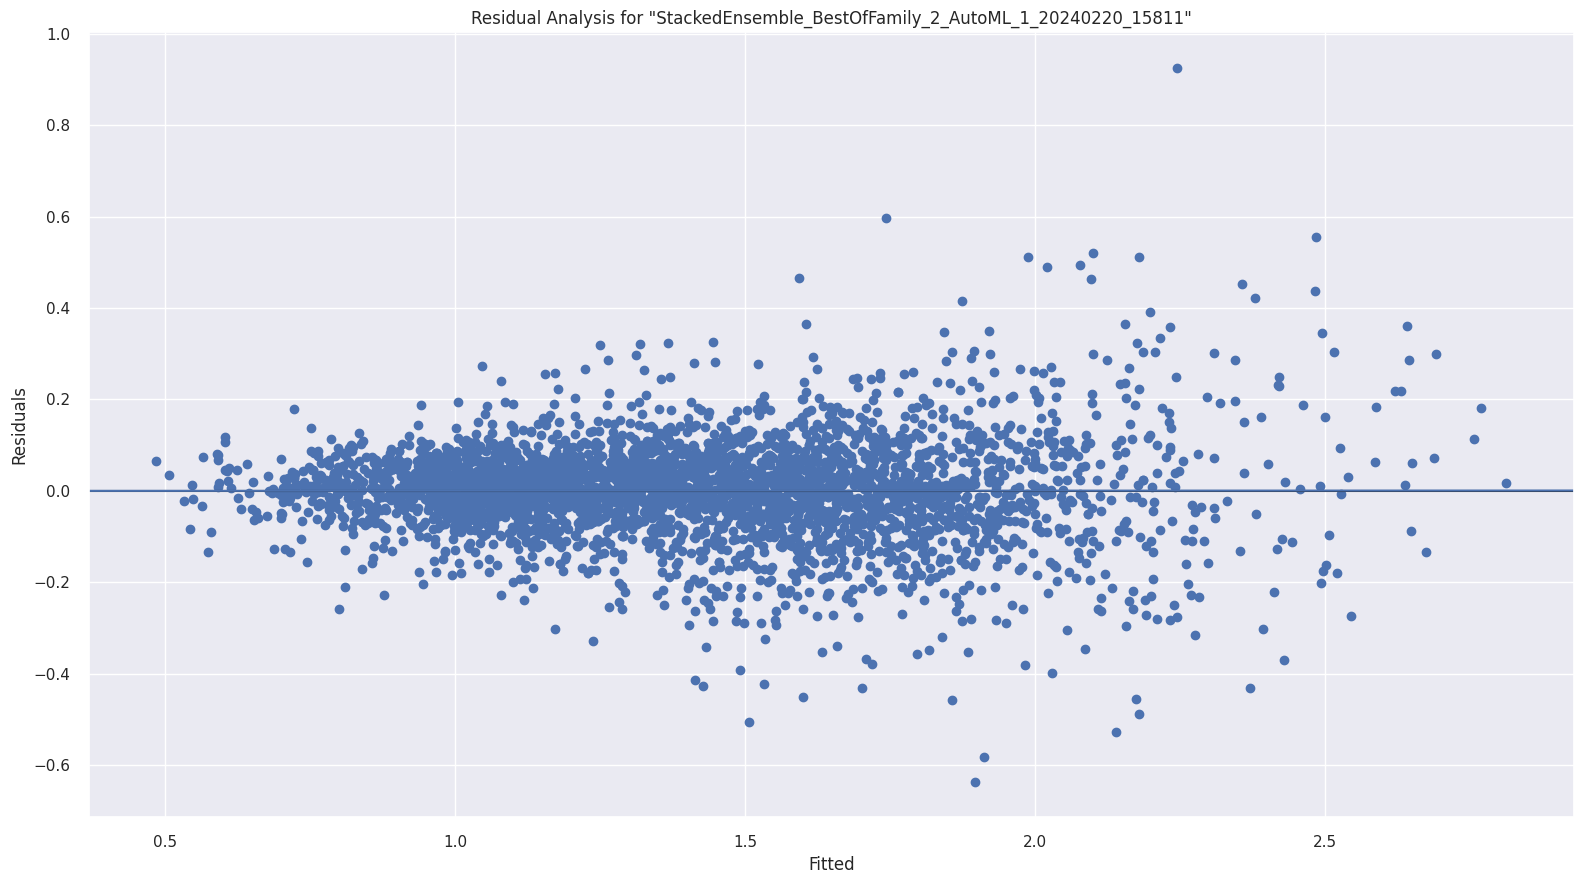

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

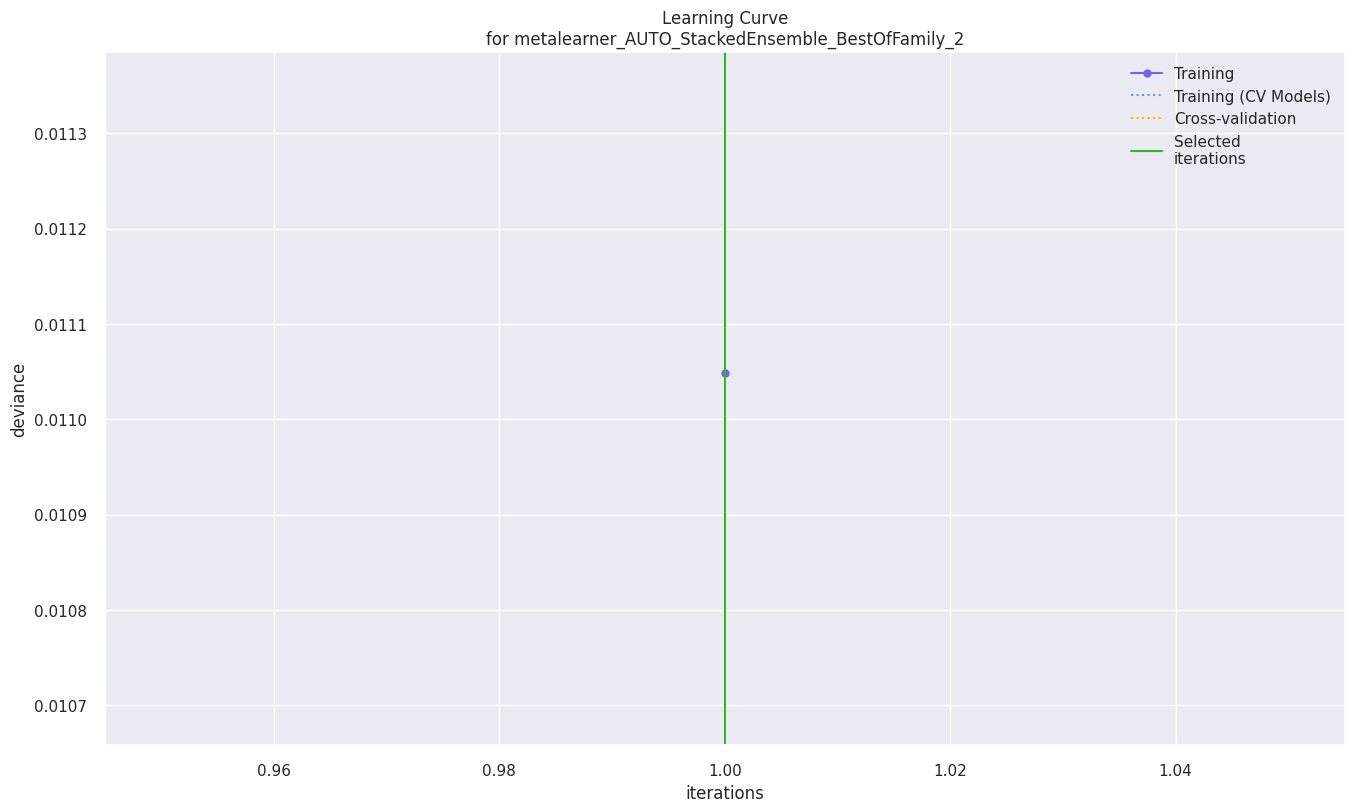

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

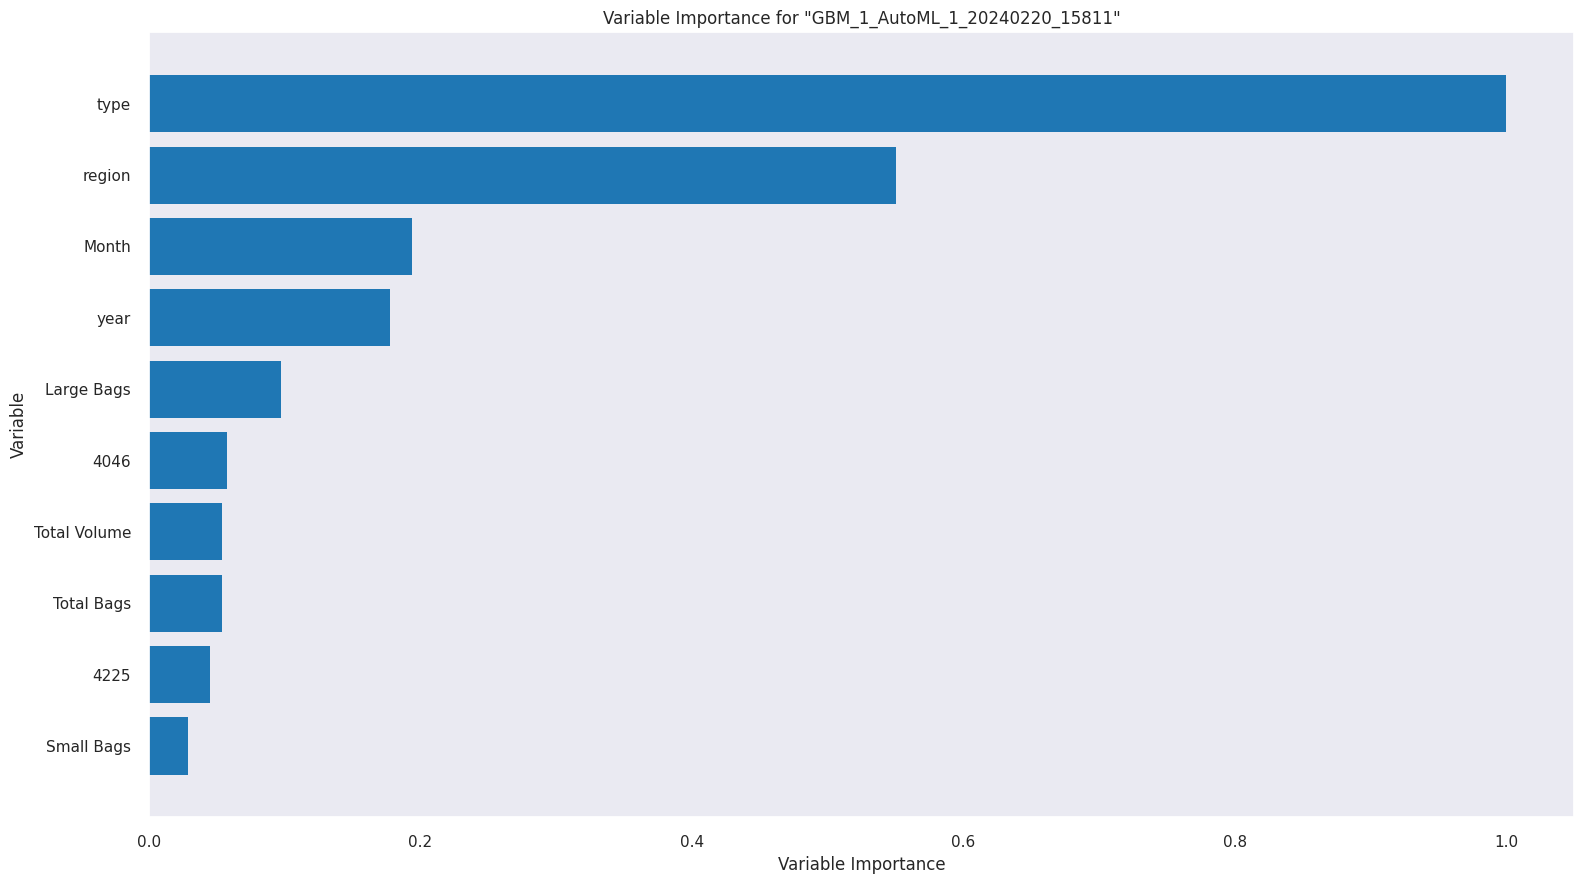

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

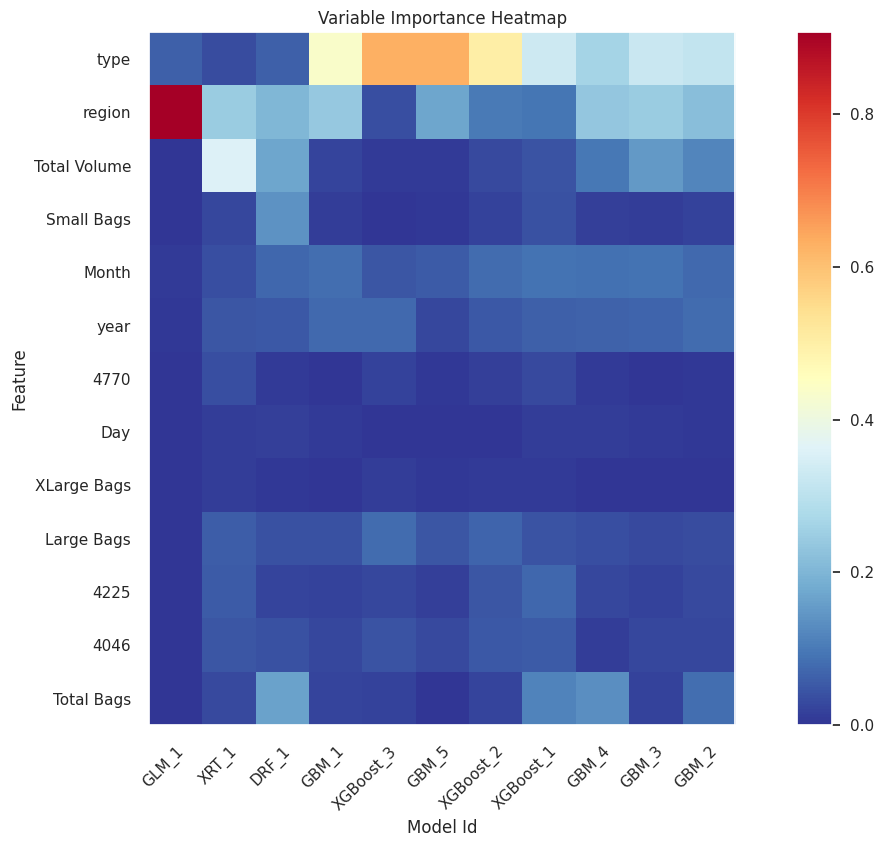

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

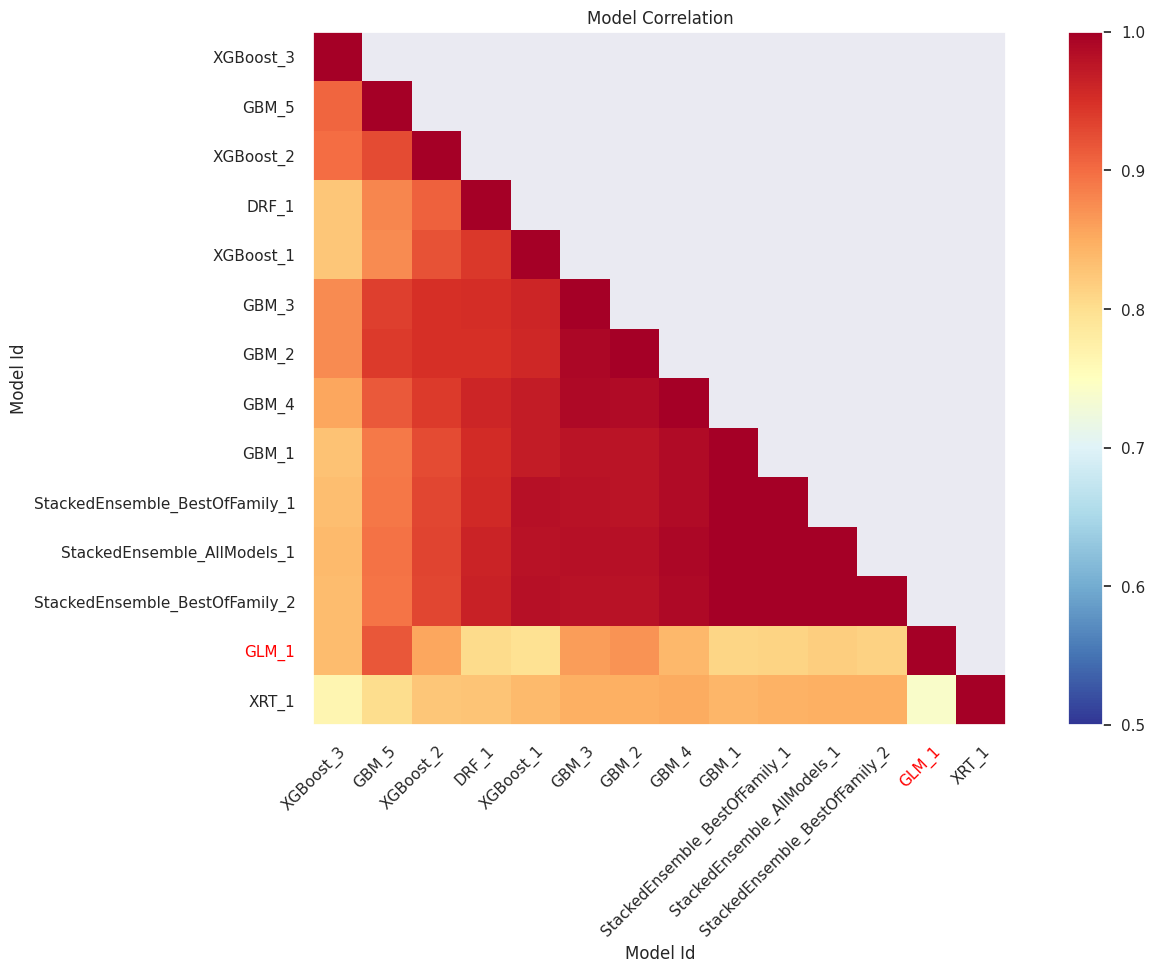

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

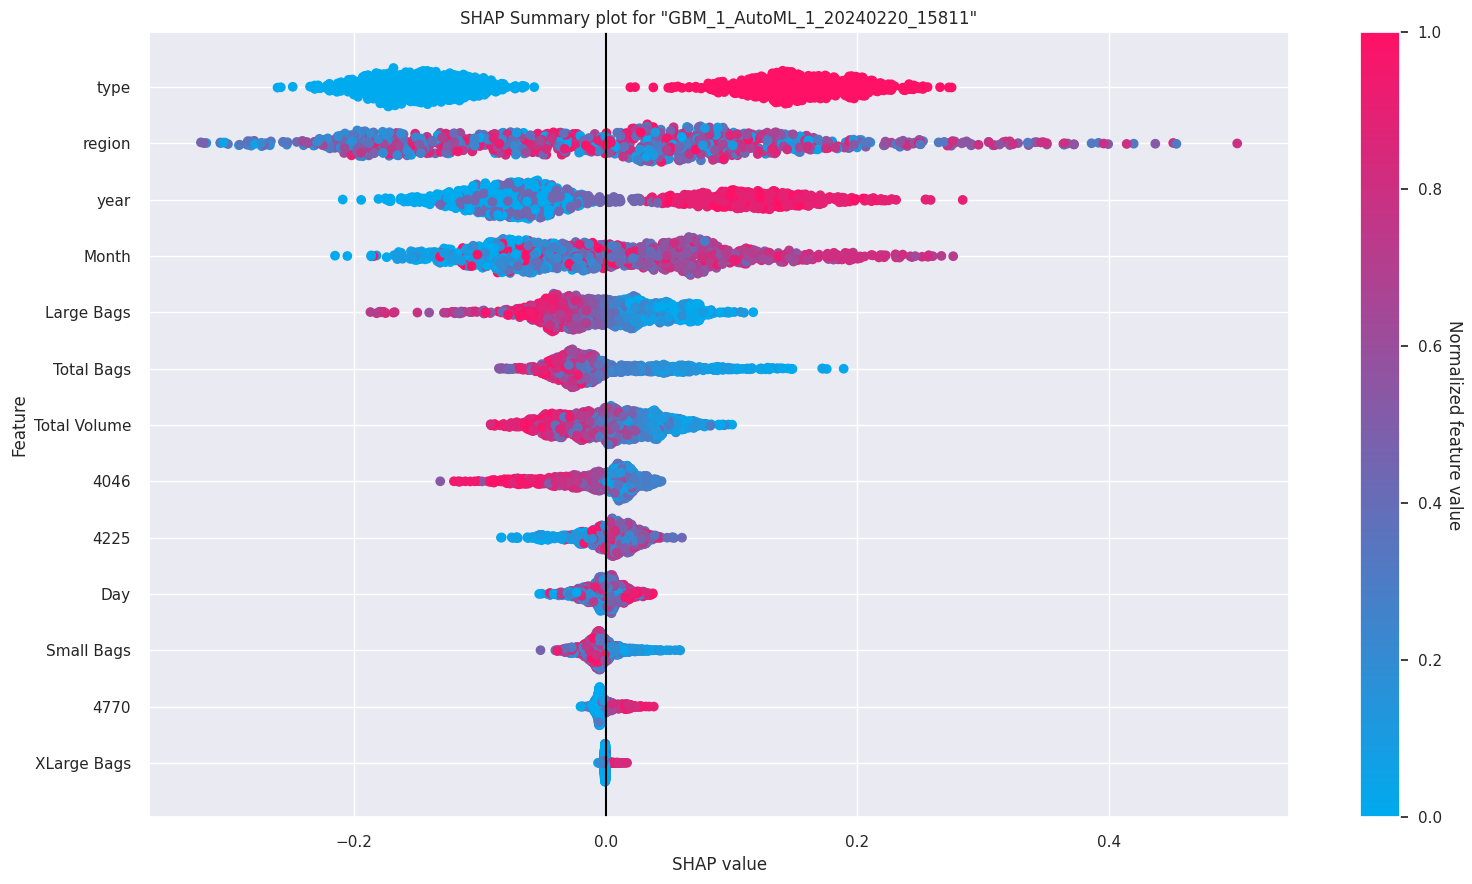

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

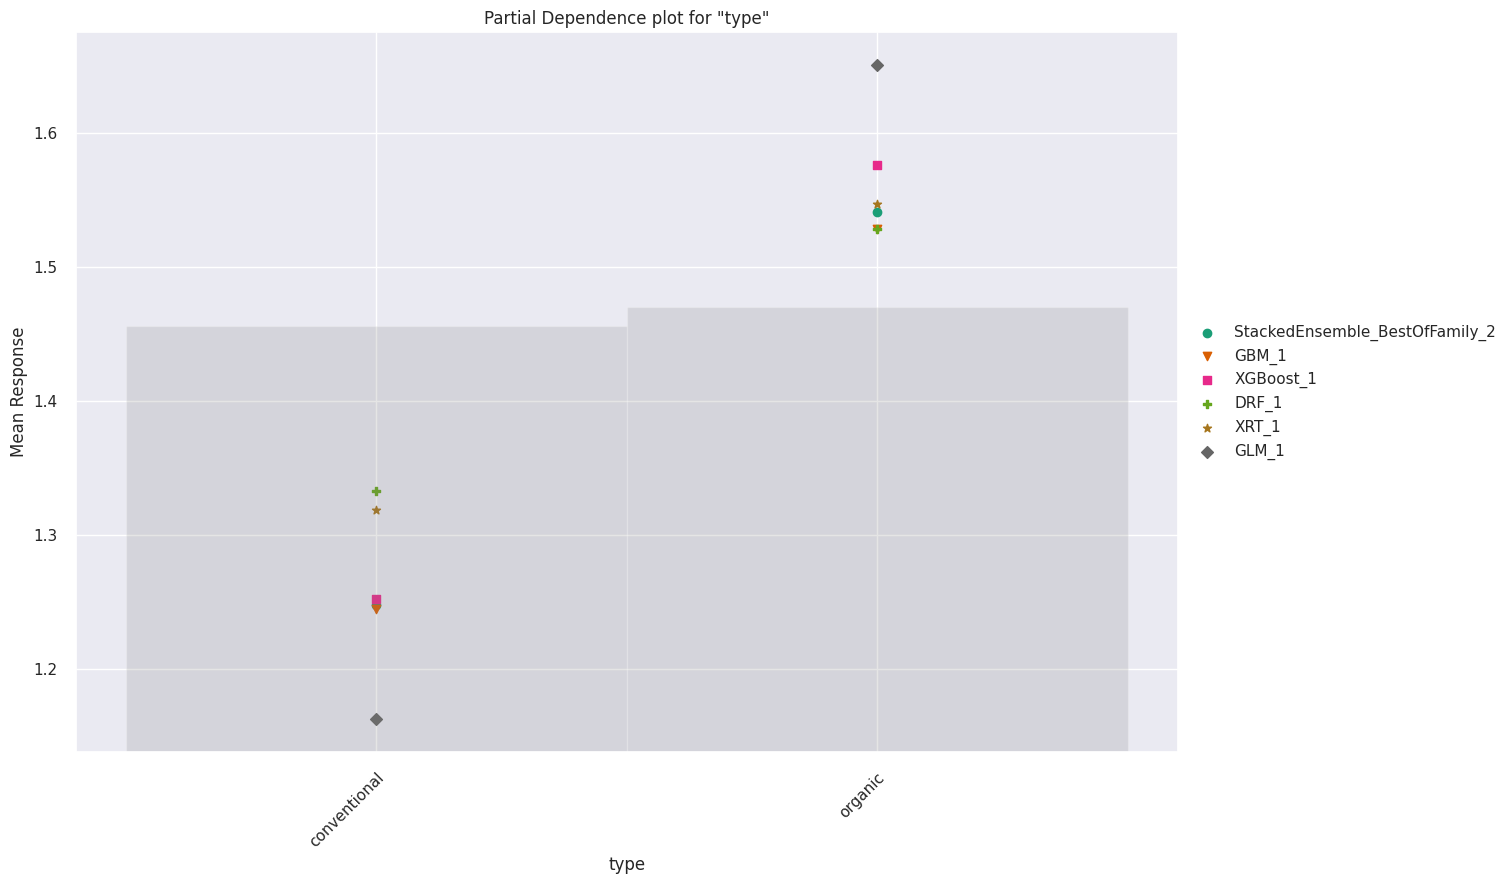

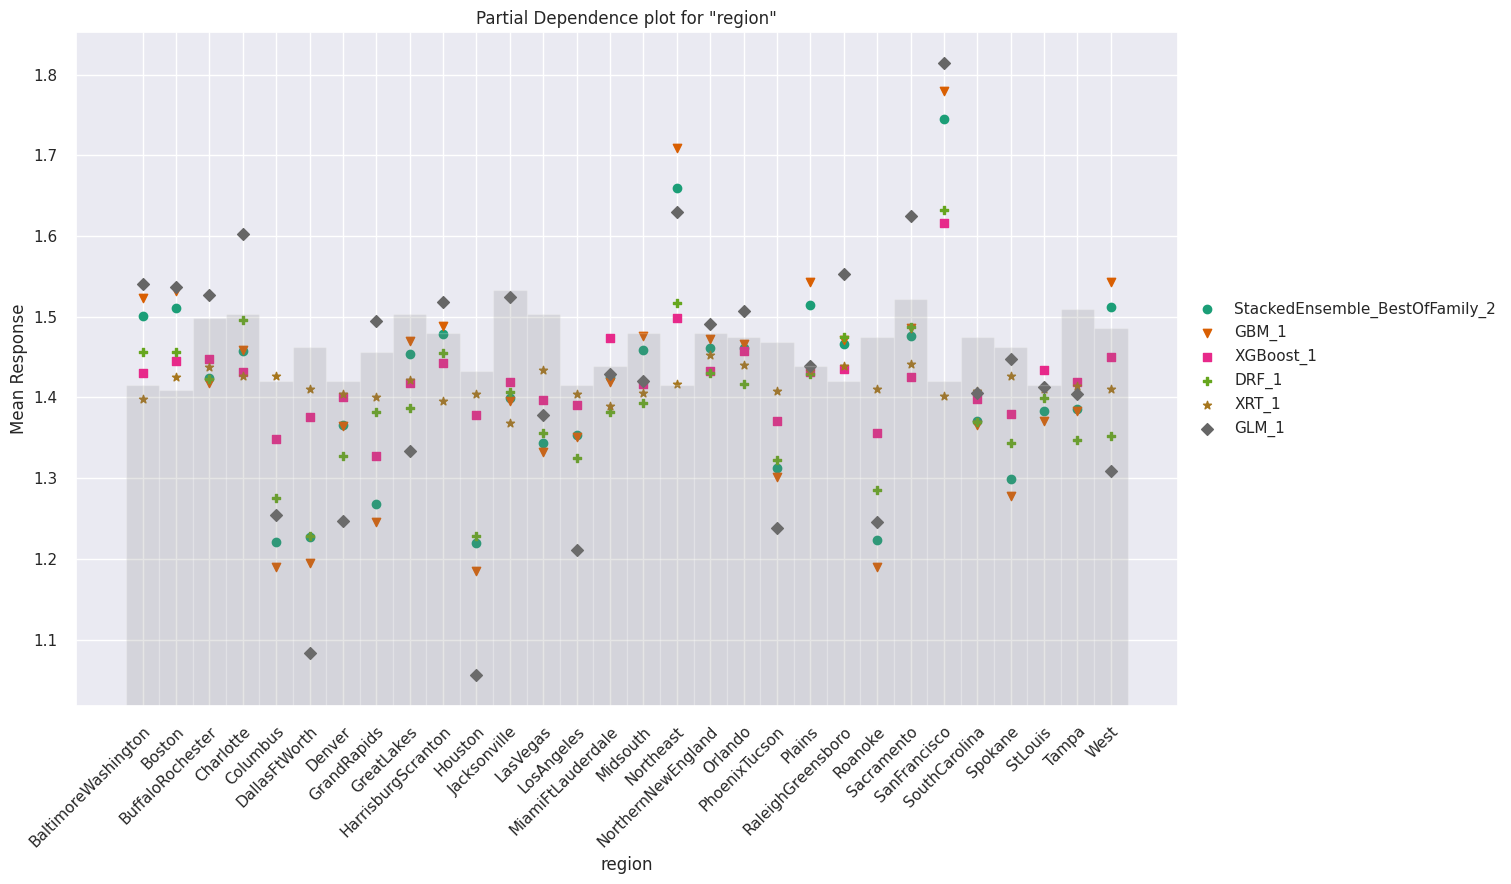

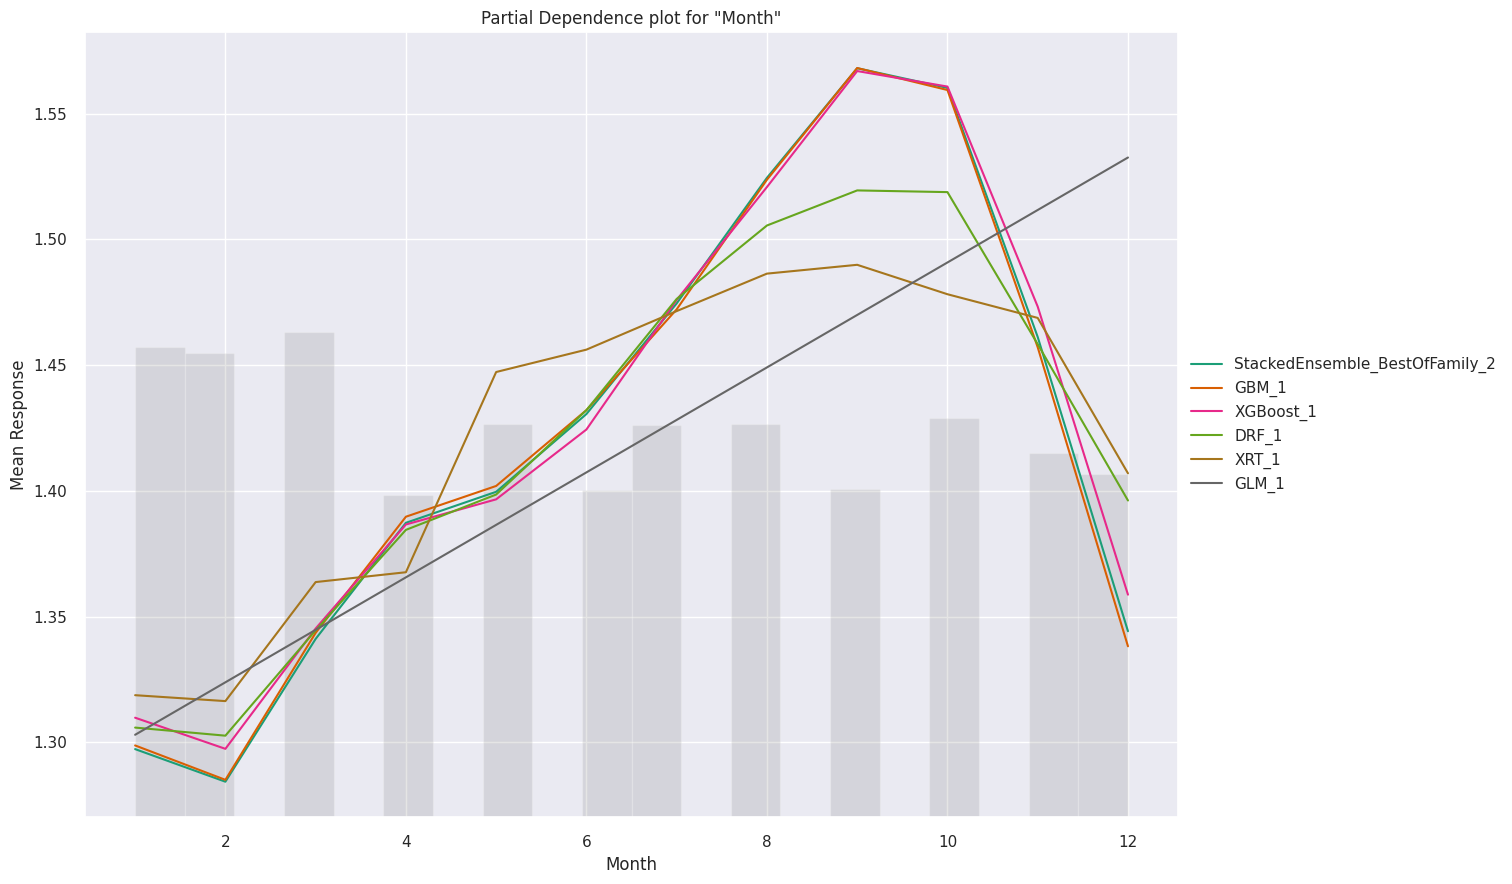

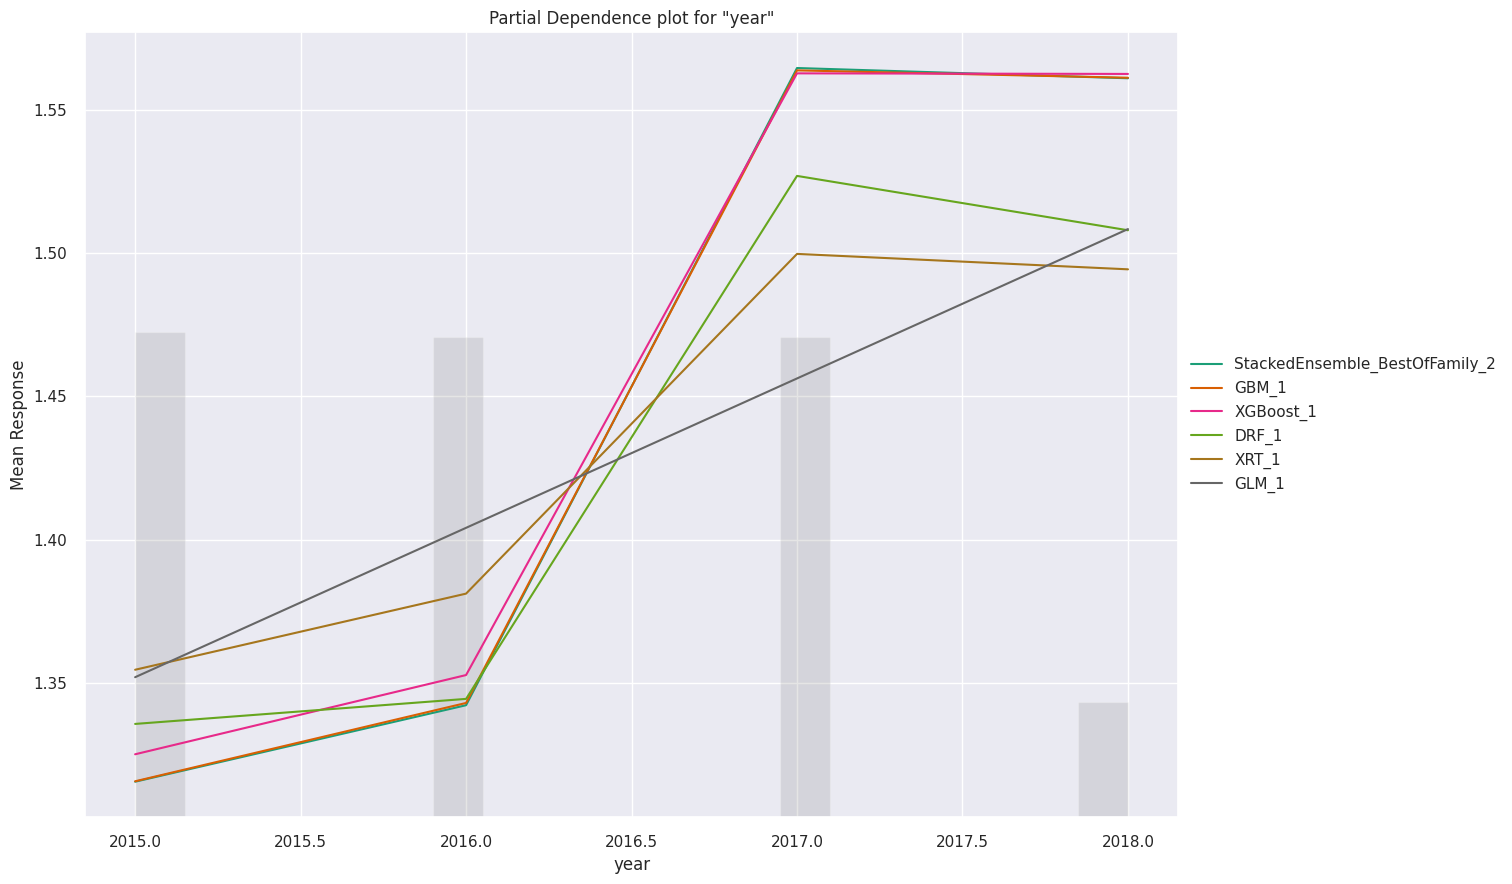

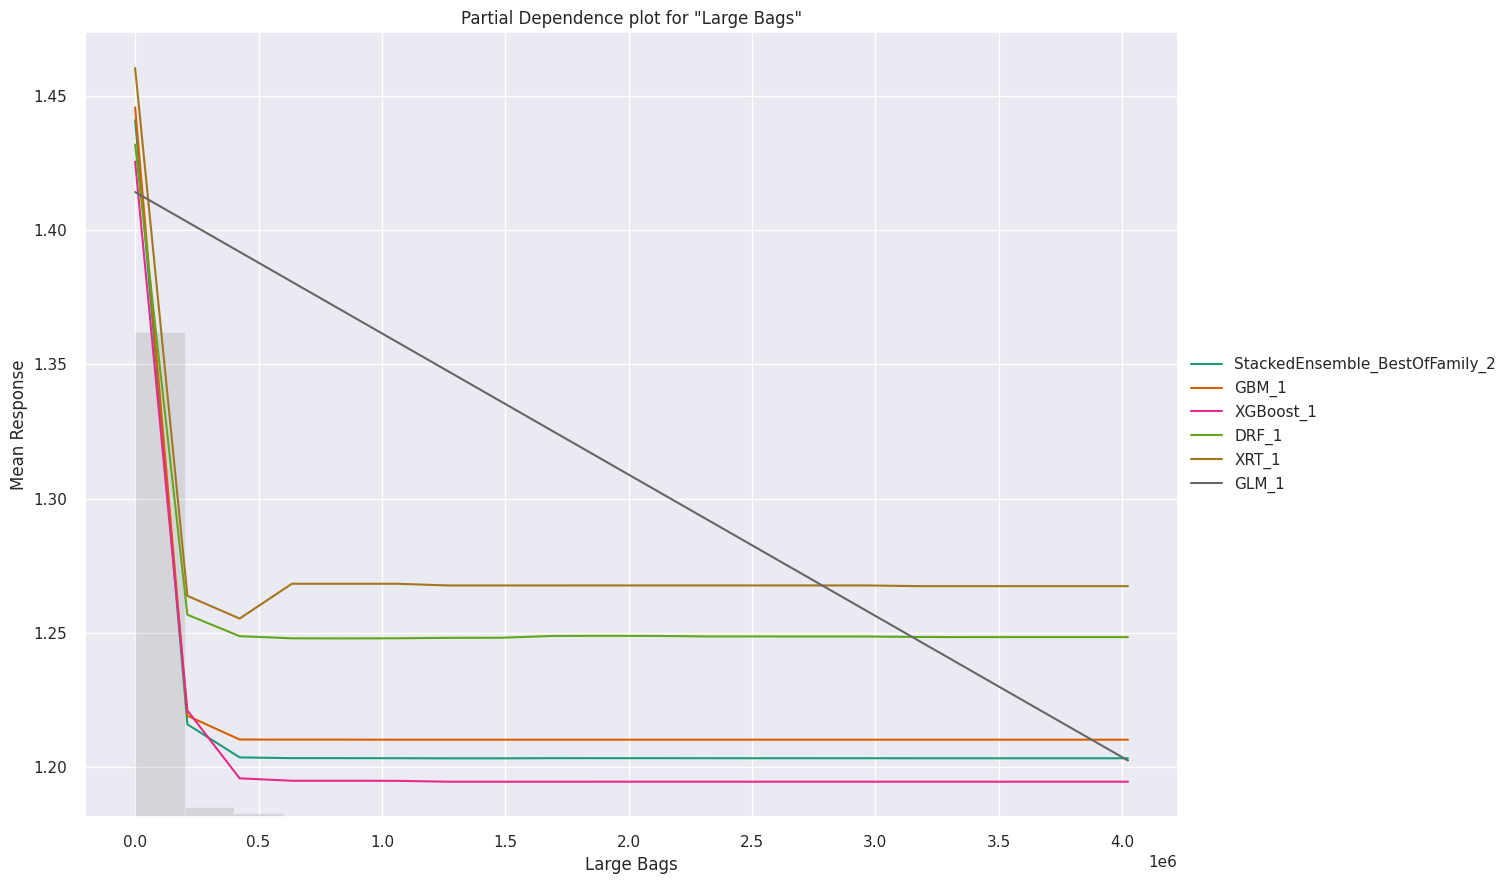

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

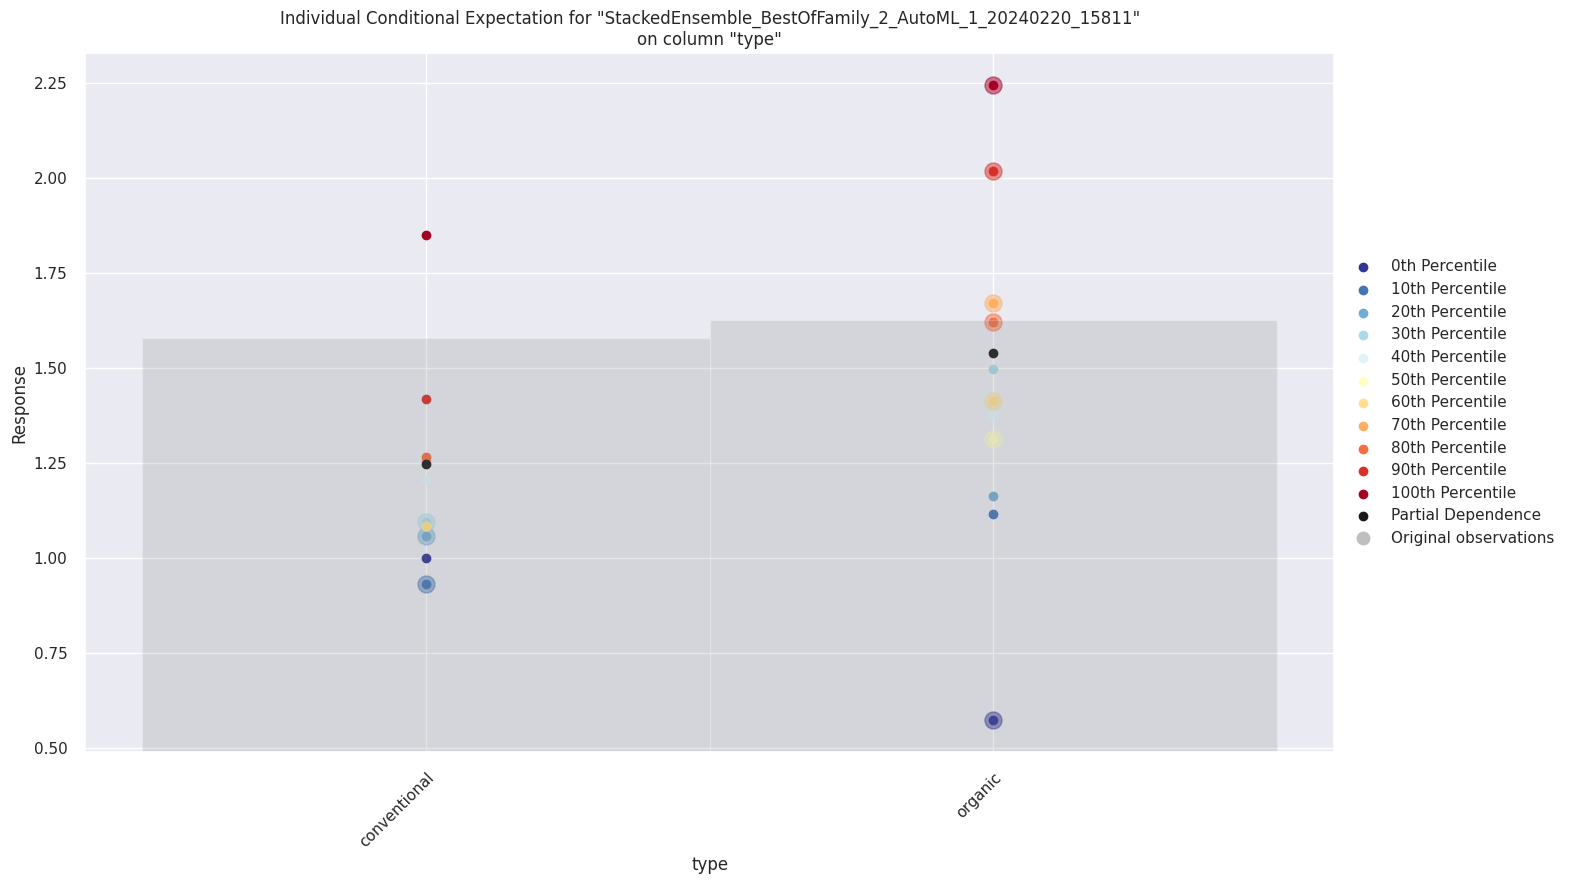

In [ ]:
exa = aml.explain(df_test)

Variable Importance Heatmap:
The heatmap shows the relative significance of each feature in the models, with color intensity indicating the level of importance. The 'region' feature, for instance, shows a high degree of importance in the GLM_1 model, while 'type' is less important across most models. Features like 'Total Volume', 'Small Bags', and 'Total Bags' vary in importance across the different models. The darker the color, the less significant the feature is for that particular model, and conversely, the brighter or lighter the color, the more important the feature. This visual aid helps in quickly identifying which features contribute most to the predictive power of the models, guiding feature selection and model tuning decisions.

Model Correlation:
The correlation heatmap illustrates the relationships between different models used in a predictive analysis. Models with higher correlation values share more similar predictions, indicating possible redundancies. For example, some of the stacked ensemble models are highly correlated with one another, suggesting that they produce similar outputs. On the other hand, models like GLM_1 exhibit low correlation with others, suggesting unique contributions to the ensemble. This kind of visualization helps in ensemble model selection by identifying models that offer diverse perspectives, which can be crucial for improving overall predictive performance.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

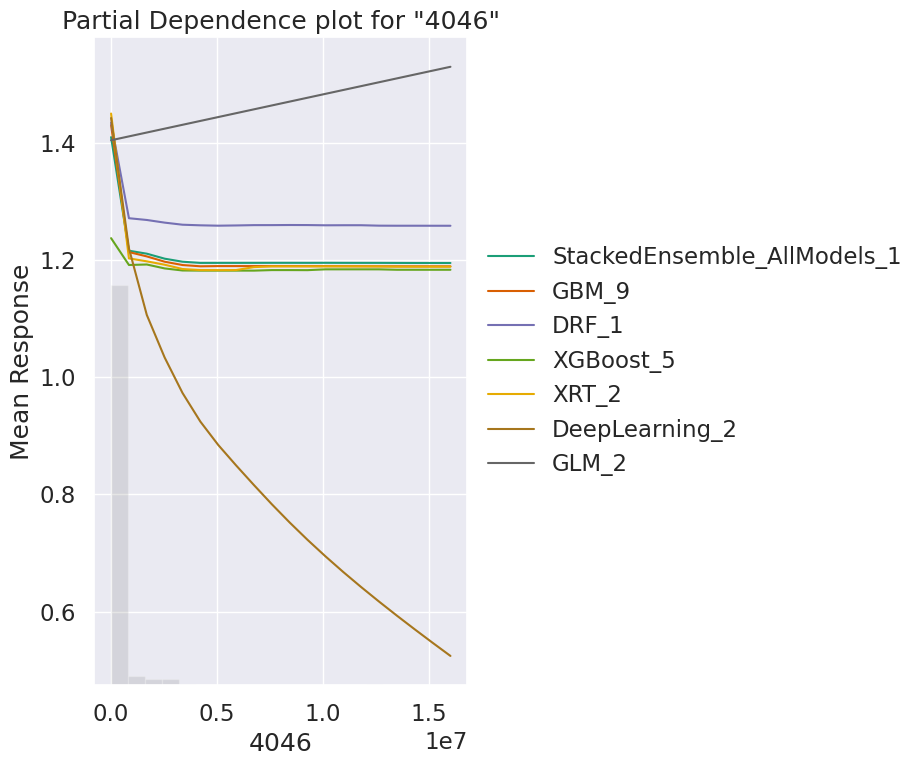

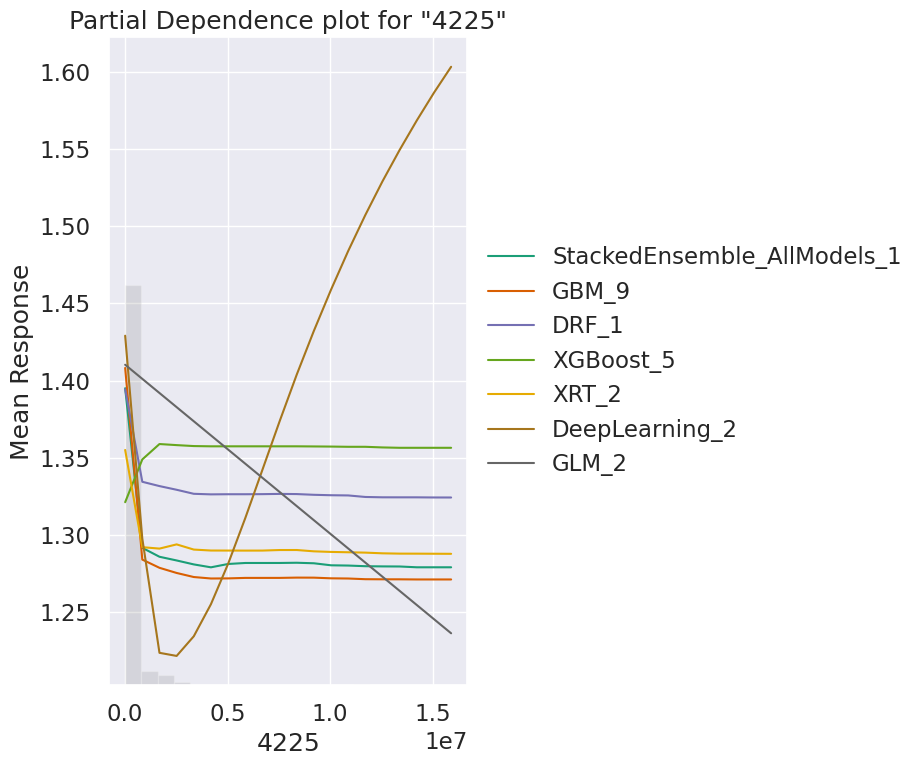

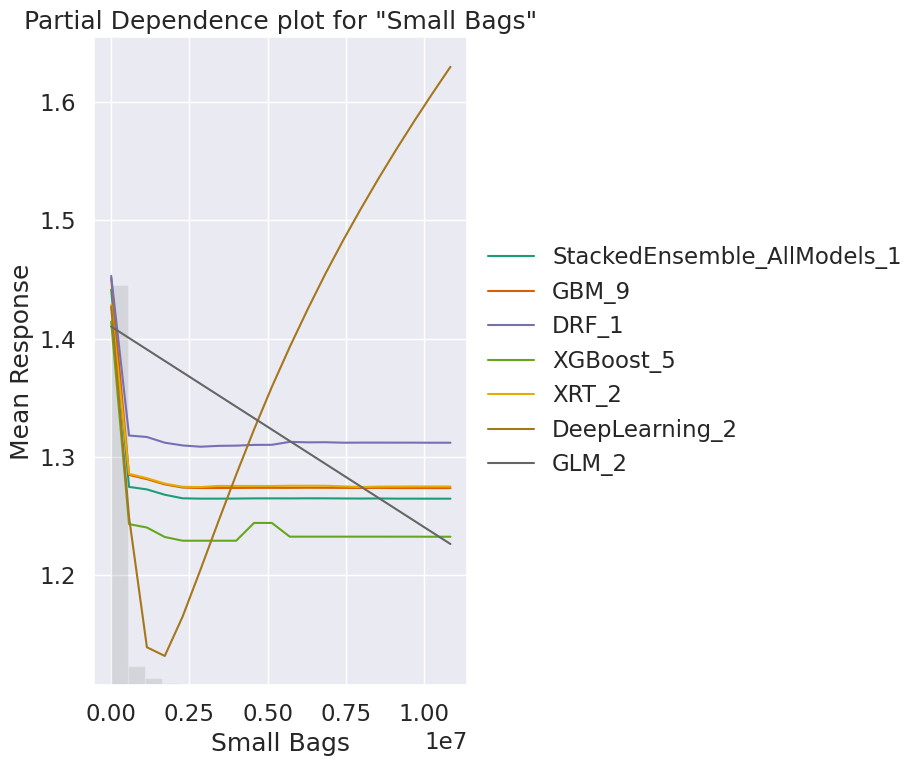

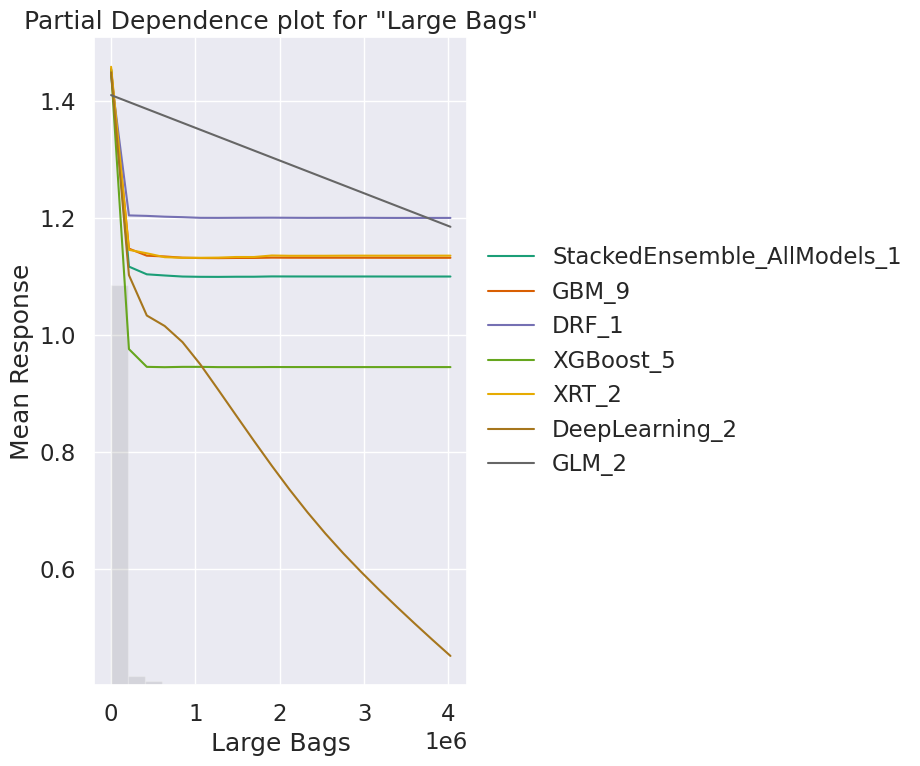

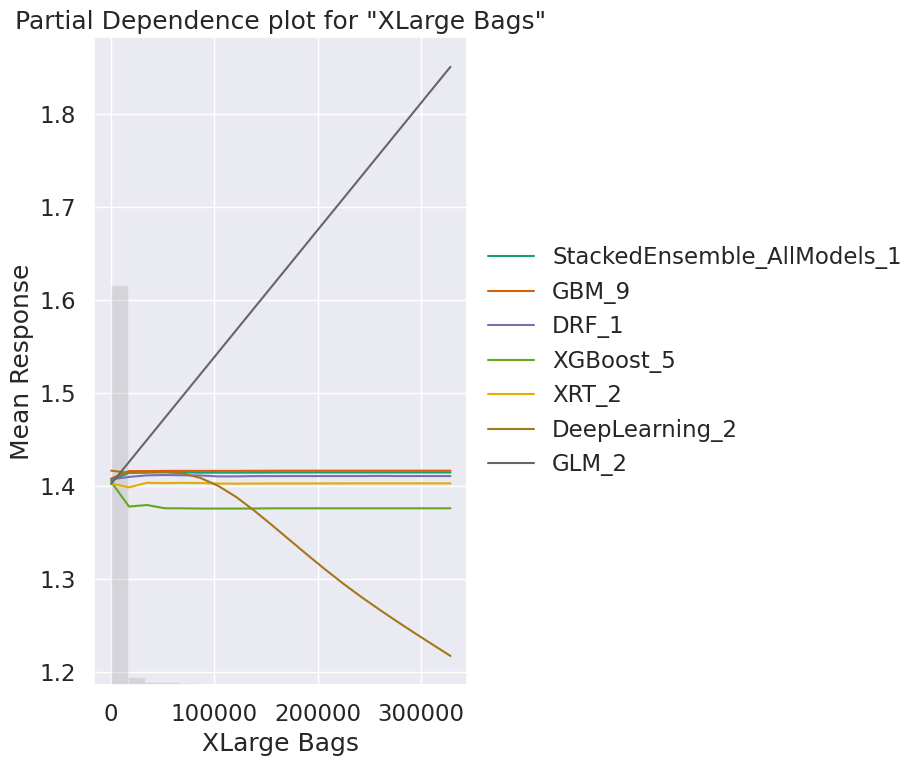

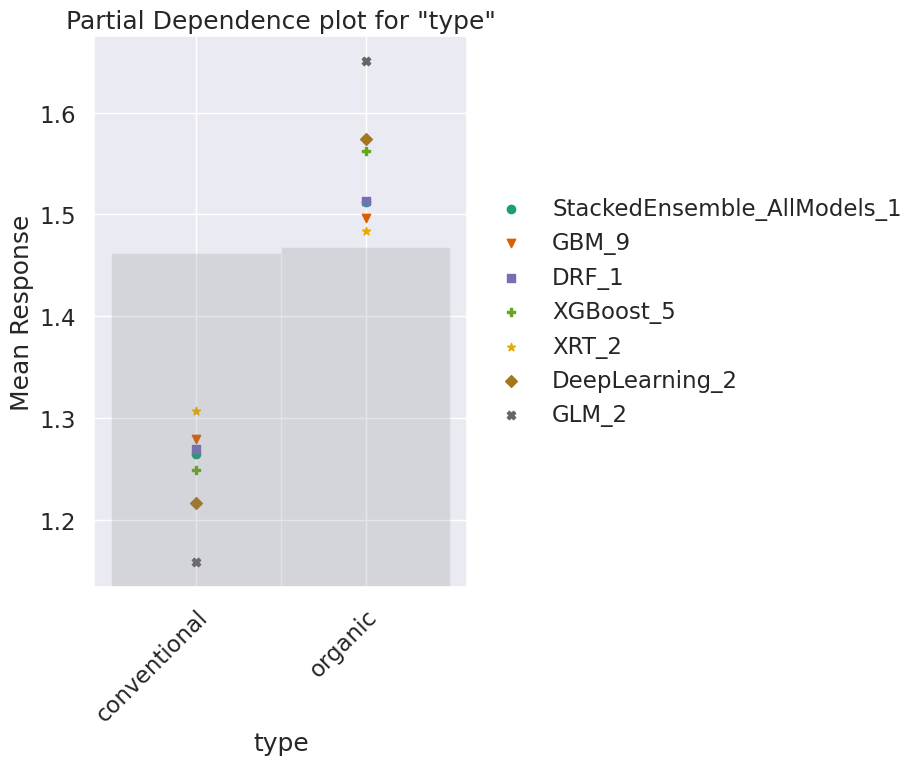

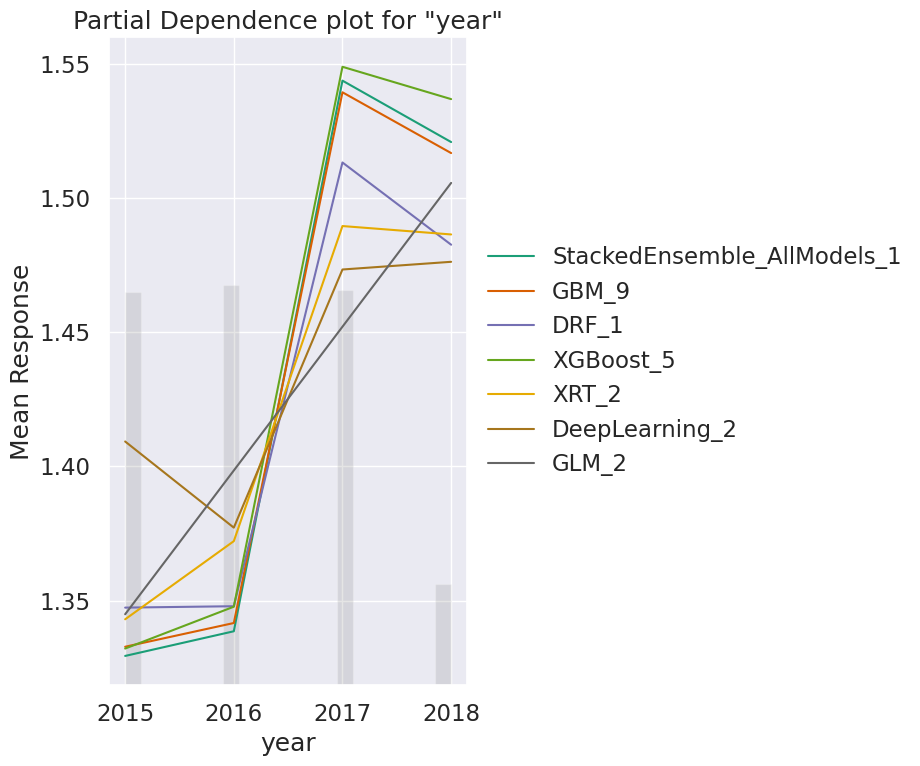

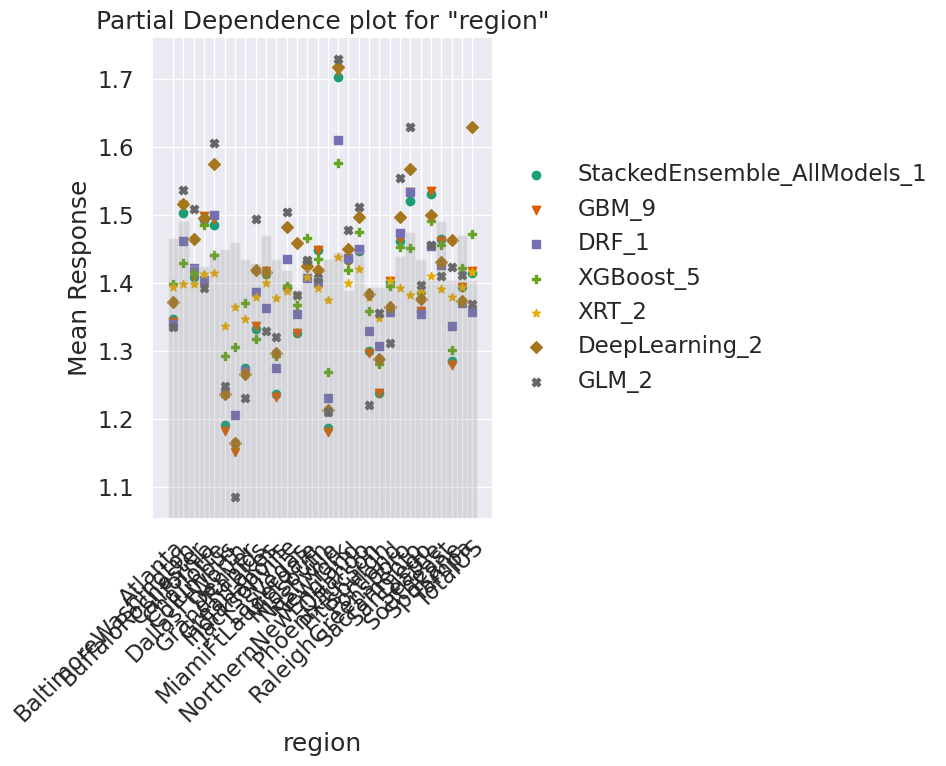

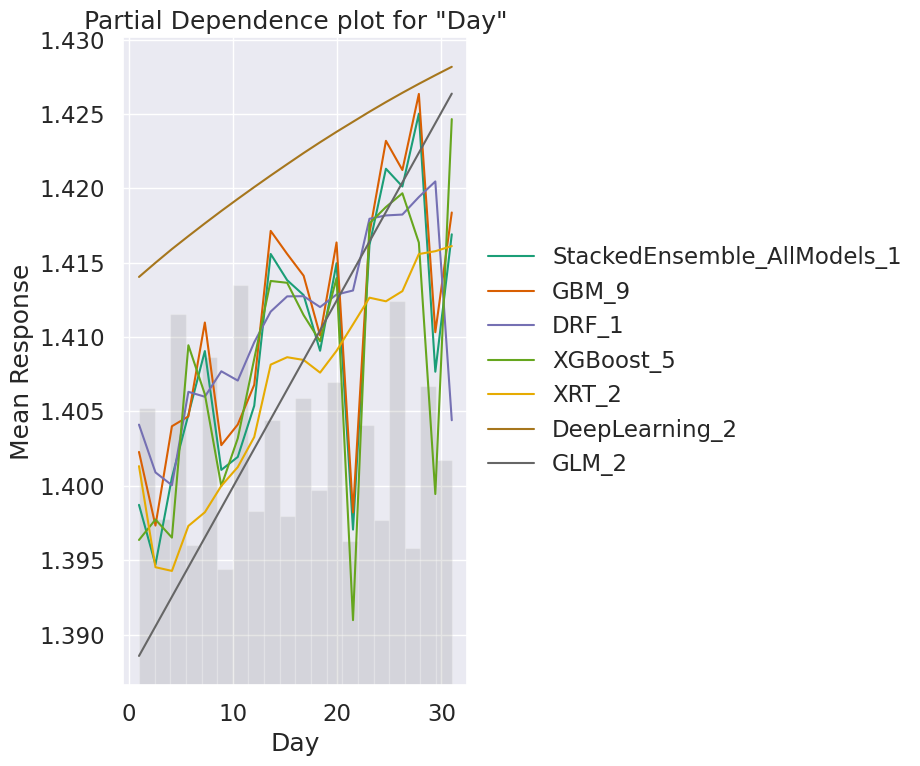

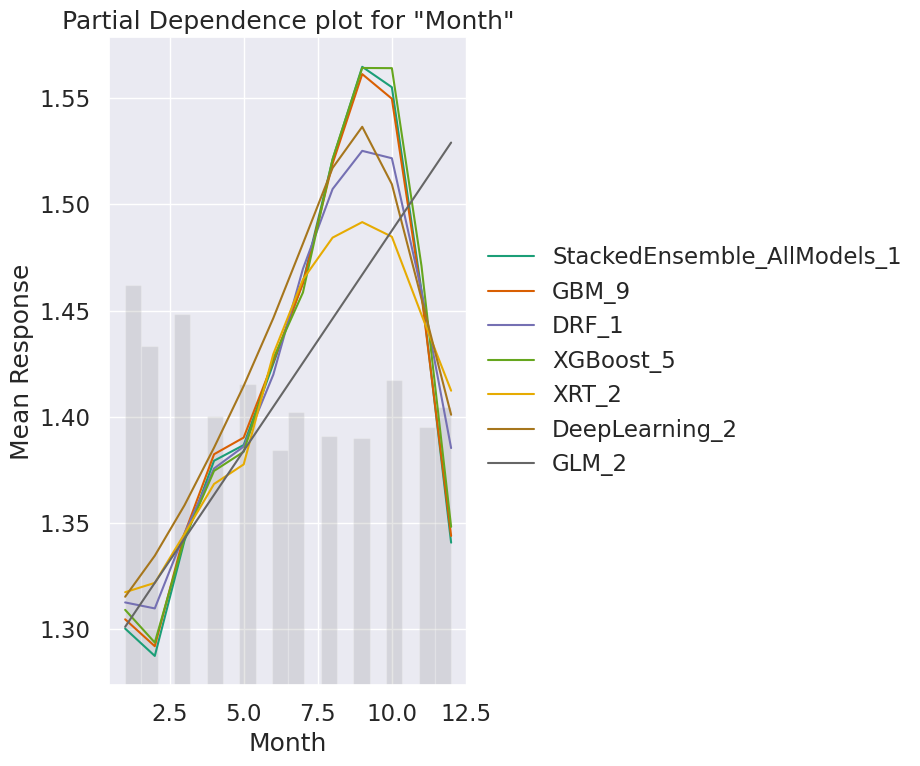

In [182]:
explain_model = aml1.explain(frame = df_test_1, figsize = (10,8),include_explanations=['pdp'])

Plot for "4046": Look for the trend line that shows the relationship between feature "4046" and the mean response. If the line is relatively flat, it implies little effect. A sloping line, either positive or negative, suggests a stronger effect. Notice if there are any anomalies or sharp changes which might suggest non-linear relationships or interactions with other variables.

Plot for "4225": Similar to "4046", the plot for "4225" should be examined for trends or patterns. Since "4225" is likely another feature (perhaps another type of product or attribute), you would look for how changes in "4225" values affect the mean response.

In [203]:
train, validate, test = np.split(df_p.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [205]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1,11)],
}

In [206]:
search_criteria = {"strategy": "RandomDiscrete", "max_models":36,"seed":1}

In [210]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,)

In [215]:
df_p3=df_p.copy()
#df_p3['type_encoded1'] = label_encoder.fit_transform(df_p3['type'])
#df_p3['region_encoded1'] = label_encoder.fit_transform(df_p3['region'])
Q = df_p3.columns
R = df_p3['AveragePrice']
Q

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Day', 'Month'],
      dtype='object')

In [218]:
# Assuming 'X' is an H2OFrame and you want to use all columns as predictors except the target column 'y'
predictor_columns = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Day', 'Month']
Y = 'AveragePrice' # 'y' is the name of your target variable

# Now train your GBM model using the list of predictor column names
gbm_grid2.train(
    x=predictor_columns,
    y=Y,
    training_frame=train,
    validation_frame=validate,
    ntrees=100,
    seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  --------------------
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.01130804633376882
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.01232860650483767
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.01250138240341474
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.013228602835590622
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.01575743333709789
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.016177799977082876
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   0.016556521247329262
     0.4                  0.08          6.0          0.9                 gbm_grid2_model_28  0.017807486736828654
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  0.022660600744113107
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.023895188101913448
---  ---                  ---           ---          ---                 ---                 ---
     0.7000000000000001   0.07          2.0          0.6000000000000001  gbm_grid2_model_32  0.047467224319222685
     0.5                  0.05          2.0          0.8                 gbm_grid2_model_27  0.05252923292892542
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   0.05429731860166694
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.05471214510197671
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.06084477997533767
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  0.06168674493685366
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.07054870712413182
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.07624844940036364
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.08649168530270077
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.08659887168209071
[36 rows x 7 columns]

In [219]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [220]:
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  --------------------
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.01130804633376882
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.01232860650483767
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.01250138240341474
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.013228602835590622
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.01575743333709789
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.016177799977082876
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   0.016556521247329262
     0.4                  0.08          6.0          0.9                 gbm_grid2_model_28  0.017807486736828654
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  0.022660600744113107
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.023895188101913448
---  ---                  ---           ---          ---                 ---                 ---
     0.7000000000000001   0.07          2.0          0.6000000000000001  gbm_grid2_model_32  0.047467224319222685
     0.5                  0.05          2.0          0.8                 gbm_grid2_model_27  0.05252923292892542
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   0.05429731860166694
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.05471214510197671
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.06084477997533767
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  0.06168674493685366
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.07054870712413182
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.07624844940036364
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.08649168530270077
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.08659887168209071
[36 rows x 7 columns]

In [221]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [222]:
models = gbm_gridperf2.models

In [223]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [224]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [226]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [227]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.5        0.10          9          1.0           0.011308
1               0.9        0.09          8          0.9           0.012329
2               0.9        0.09          9          0.6           0.012501
3               0.8        0.06          9          0.6           0.013229
4               0.8        0.03          9          0.9           0.015757
5               0.9        0.03         10          0.5           0.016178
6               0.5        0.05          7          0.9           0.016557
7               0.4        0.08          6          0.9           0.017807
8               0.7        0.06          5          0.6           0.022661
9               0.3        0.03          8          1.0           0.023895
10              0.7        0.03          6          1.0           0.024718
11              0.9        0.10          4          0.7           0.024867
12              0.6      

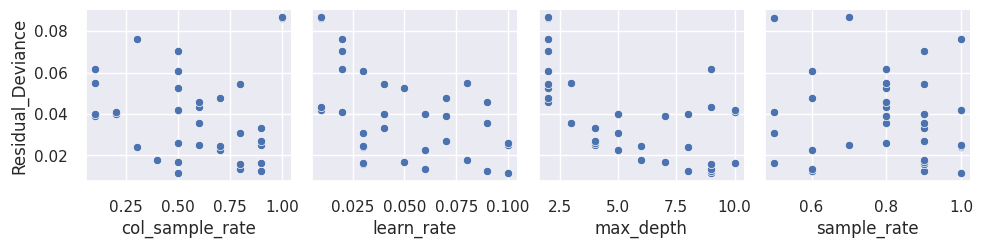

In [228]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

The summary of the hyperparameter search you provided seems well-organized and shows a standard output typical of a grid search procedure using Gradient Boosting Machine (GBM) models in H2O. The table presents various combinations of hyperparameters explored during the grid search, along with each model's residual_deviance, a commonly used metric to assess the performance of regression models.

Each line in the table corresponds to a GBM model that was trained using a unique combination of hyperparameters:

col_sample_rate: Defines the proportion of features selected randomly without replacement to construct each tree, dictating the diversity of features considered at each split.
learn_rate: Also known as shrinkage, this parameter moderates the influence of each tree on the final model, aiding in reducing overfitting by applying more substantial regularization.
max_depth: Specifies the maximum allowed depth for each tree, with deeper trees capturing more complex patterns at the risk of overfitting.
sample_rate: Represents the proportion of the dataset sampled without replacement to grow each tree, influencing the variety of data each tree is exposed to.
model_ids: Are the distinct identifiers assigned to each model generated throughout the grid search process.
residual_deviance: Indicates the model's goodness of fit to the data, where lower values suggest a more accurate model.
The models are ranked in the table based on ascending values of residual_deviance, implying that models listed higher are better at explaining the data compared to those lower down.

**ANSWERS**


**Q1) Is the relationship significant?**
Yes, the relationship between several predictor variables and the target variable (Stage) appears to be significant. This is indicated by the p-values associated with the coefficients in the OLS regression results. Variables with p-values less than 0.05 (e.g., type, region, large_bags, xlarge_bags, var_4225,day,month,year) are considered to have a statistically significant relationship with the target variable.

**Q2) Are any model assumptions violated?**
Assumptions for linear regression are:
1) Linearity: The assumption of linearity, which stipulates that the relationship between the dependent variable and each independent variable should be linear when holding other variables constant, is met for several predictor variables in the model. This indicates that the linearity assumption has not been breached.
2) Homoscedasticity: This term refers to the expectation that the residuals should be normally distributed—essentially, forming a bell-shaped curve when plotted. The model's residuals align with this assumption, indicating that the error distribution is normal.
3)	No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists between the variables total bags and 'small bags,large bags,xlarge bags' & total volume and '4225,4662,4770'.
4)	No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is 0.4, therefore this assumption is violated.

**Q3) Is there any multicollinearity in the model?**
Multicollinearity occurs when there is a high correlation between independent variables, diminishing the reliability of their individual significance in a model. It is problematic as it can distort the statistical significance of independent variables.
To detect multicollinearity, one can examine the correlation matrix or compute the Variance Inflation Factor (VIF) for the variables.
A correlation coefficient close to +1 or -1 indicates strong correlation. VIF values exceeding 10 signify the presence of multicollinearity.
In the analyzed model, certain variables displayed VIF values over 10 and had p-values above the 0.05 threshold. Removing these variables improved the model's metrics. Presently, there is a notable correlation between 'total bags' and the subcategories 'small bags', 'large bags', and 'xlarge bags', as well as between 'total volume' and the specific PLU codes '4225', '4662', and '4770'.

**Q4) In the multivariate models are predictor variables independent of all the other predictor variables?**

Variables are considered independent if they do not exhibit any relationship with each other. This independence can be assessed through a correlation matrix or visually inspected in graphical representations for any discernible patterns.
Upon evaluating the correlation matrix for the model, it is evident that 'total bags' is correlated with its constituent categories—'small bags', 'large bags', and 'xlarge bags', and 'total volume' shows correlation with the PLU codes '4225', '4662', and '4770'. Apart from these, the remaining predictor variables appear to be independent of one another.

Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
From the variable importance plot, the most to least important variables are displayed.For my model region, Type, 4046 and month are top 4 most important variables to determine Price. VIF and p-values for total bags, Total Volume,Var_4770 was high than the ideal values. So those variables were excluded from the model.

Q6) Does the model make sense?
For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low, in my case RMSE is 0.051 which is very good for a model considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.98 which is considered good in terms of accuracy. So overall the model makes sense.
To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

Q7)Does regularization help?
Regularization is a method applied to temper the noise function by incorporating an extra term into the noise function's equation. This added term helps in moderating the function's fluctuations, ensuring that the coefficients remain within a reasonable range and thereby stabilizing the model's predictions for test data. The primary objective of regularization is to reduce the validation error, thereby enhancing the model's predictive accuracy.

In the given model, both Ridge and Lasso regularization techniques were applied to the training data. The effect of these regularization methods led to the elimination of certain predictors, effectively reducing their coefficients to zero. This indicates that regularization has a positive impact on the model by refining the set of active predictors, which can improve the model's performance by focusing on the most relevant features. Therefore, it can be inferred that regularization has a beneficial effect on the AutoML model in this context.

Q8) Which independent variables are significant?
 Variables are significant when p-value is less than 0.05. For this model except for 4225,4770,small bags, total volume, total bags all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

 Q9) Which hyperparameters are important?
The summary of the hyperparameter search highlights that critical hyperparameters for the GBM models include col_sample_rate, learn_rate, max_depth, and sample_rate. The top-performing models were identified based on certain combinations of these hyperparameters, underscoring their significance in enhancing the model's effectiveness.

Q10) Coding professionalism?
In the assignment, coding professionalism was upheld through several key practices:

Code Clarity: Utilized descriptive variable names and modular structures with functions and classes for easy understanding and maintenance.
Documentation: Included comments explaining critical code sections, model choices, hyperparameter significance, and SHAP value interpretations.
Best Practices: Adhered to PEP 8 guidelines for Python coding, enhancing readability and consistency.
Version Control: Implied the use of Git for change tracking and collaboration, contributing to an organized code repository.
Library Use: Employed established libraries like pandas, statsmodels, and H2O AutoML, demonstrating efficient tool utilization.
Error Handling: Implemented error handling to manage potential exceptions, ensuring code robustness.
Testing and Review: Conducted testing and peer/self-review to ensure functionality and refine code quality.
Performance Optimization: Focused on hyperparameter selection and model tuning to maximize performance.
Continuous Learning: Showcased an understanding of current machine learning practices, indicating ongoing learning and adaptability.
These practices ensured not only optimal analytical results but also a professional, transparent, and rigorous development process.












**CONCLUSION**
The Ordinary Least Squares (OLS) regression analysis revealed significant multicollinearity among the predictor variables, with varying degrees of statistical significance. The AutoML process pinpointed the Gradient Boosting Machine (GBM) as an exceptionally effective model, highlighting specific hyperparameters as crucial for reducing the residual deviance. Additionally, SHAP value analysis shed light on the relative importance of different features, identifying certain variables as particularly influential in enhancing the model's predictive accuracy.

The application of regularization techniques proved effective in curbing overfitting, while the relevance of individual variables was determined through p-value assessments and SHAP value analysis. These findings underscore the necessity for careful feature selection and demonstrate AutoML's capacity to refine predictive modeling within intricate datasets.

The project entailed developing a predictive model utilizing H2O AutoML to forecast wine quality based on various characteristics. It also explored the impact of Ridge and LASSO regularization on the Generalized Linear Model (GLM), assessed variable significance using SHAP value summaries, and conducted hyperparameter optimization via Random Grid Search.

**References:-**
H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Github Link- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

Kaggel link - https://www.kaggle.com/datasets/neuromusic/avocado-prices

MIT License

Copyright (c) 2024 Jashu284

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.